# 📊 Veri Yükleme ve İlk İnceleme

In [5121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import unicodedata
import re
import seaborn as sns

In [5122]:
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

In [5123]:
df.shape

(2235, 13)

In [5124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [5125]:
df.head(5)

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [5126]:
len(df["HastaNo"].unique().tolist())

404

## Veriye ilk bakış
- Veri setinde toplam **2235 satır** ve **13 sütun** bulunuyor.  
- `HastaNo` ve `Yas` sütunları **sayısal (int64)** tipinde.  
- Diğer sütunlar (örn. `Cinsiyet`, `KanGrubu`, `Uyruk`, `Bolum`, `Tani`, vb.) **kategorik (object)** tipinde.  
- Bazı sütunlarda **eksik değerler** mevcut:  
- `Cinsiyet`, `KanGrubu`, `KronikHastalik`, `Alerji`,`Bolum`,`Tanilar`,`UygulamaYerleri`.  
- Veri setinde hem sayısal hem de kategorik değişkenler yer almakta.   
- Eksik veriler için ilerleyen aşamalarda işlem yapılması gerekecek.
- **Hedef (Target) sütun:** `TedaviSuresi`
- **404** adet tekrar etmeyen (unique) `HastaNo` değeri var yani **404** hasta var.    

# Yaş

In [5127]:
df["Yas"].value_counts()

Yas
48    118
40     94
44     83
37     79
43     76
     ... 
13      3
83      3
87      3
76      2
6       1
Name: count, Length: 75, dtype: int64

In [5128]:
df["Yas"].isna().sum()

np.int64(0)

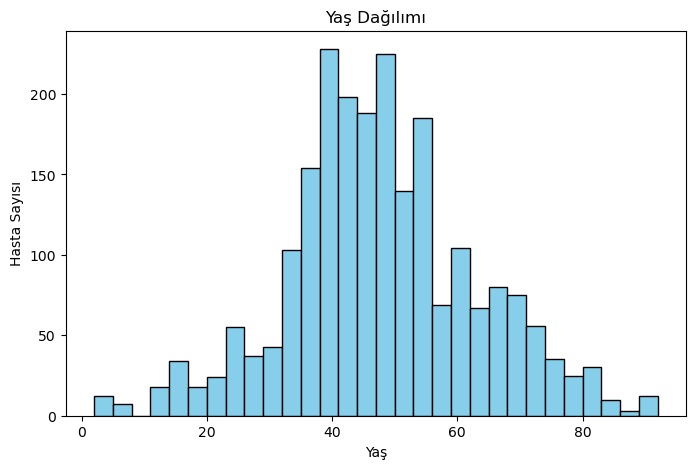

In [5129]:
plt.figure(figsize=(8,5))
plt.hist(df["Yas"], bins=30, color="skyblue", edgecolor="black")
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Hasta Sayısı")
plt.show()

### Yaş Dağılımı Analizi  

Yukarıdaki histogram, veri setindeki **hastaların yaş dağılımını** göstermektedir.  

- En yoğun hasta grubu **40-50 yaş aralığında** yer almaktadır.  
- 30 yaş altı ve 70 yaş üstünde hasta sayısı belirgin şekilde azalmaktadır.  
- Genel olarak dağılım, orta yaş grubuna (özellikle 40–50 yaş bandına) yoğunlaşmış olup, daha genç ve ileri yaşlarda seyrekleşmektedir.  

Bu durum, veri setinde **orta yaşlı bireylerin ağırlıklı olduğunu** ve yaşın tedavi süreçlerinde önemli bir değişken olabileceğini göstermektedir.

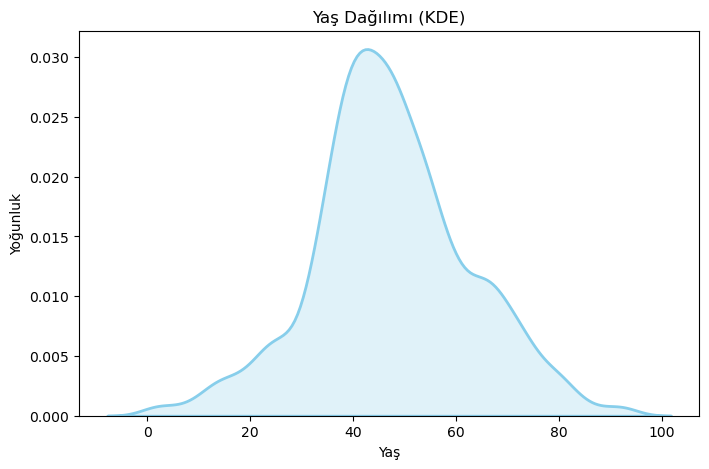

In [5130]:
plt.figure(figsize=(8,5))
sns.kdeplot(df["Yas"], fill=True, color="skyblue", linewidth=2)
plt.title("Yaş Dağılımı (KDE)")
plt.xlabel("Yaş")
plt.ylabel("Yoğunluk")
plt.show()

# Cinsiyet

In [5131]:
df["Cinsiyet"].isna().sum()

np.int64(169)

- Veri setinde **169 satırda Cinsiyet bilgisi eksik** durumdadır.  
- Bu oran, toplam 2235 satırın yaklaşık **%7,5**’ine denk gelmektedir.  
- Eksik değerler analiz sırasında dikkate alınmalıdır.  

In [5132]:
# Cinsiyeti bilinmeyenlerin HastaNo değerleri
df[df["Cinsiyet"].isnull()]["HastaNo"].unique()

array([145228, 145236, 145243, 145244, 145245, 145255, 145272, 145279,
       145292, 145304, 145310, 145311, 145321, 145330, 145339, 145344,
       145347, 145358, 145368, 145375, 145391, 145402, 145415, 145419,
       145428, 145438, 145443, 145461, 145462, 145475, 145489, 145516,
       145524])

- **33** kişinin cinsiyet değeri bulunmamakta.  

In [5133]:
df["Cinsiyet"].fillna("Bilinmiyor", inplace=True)

/var/folders/yf/rds_m3nj71s_qfh7c9cx8yy40000gn/T/ipykernel_38170/1702889887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cinsiyet"].fillna("Bilinmiyor", inplace=True)


- Eksik değerler `"Bilinmiyor"` şeklinde yeni bir kategori olarak dolduruldu.  
- Böylece hem veri kaybı yaşanmadı hem de cinsiyet dağılımı gerçekçi bir şekilde korunmuş oldu.  

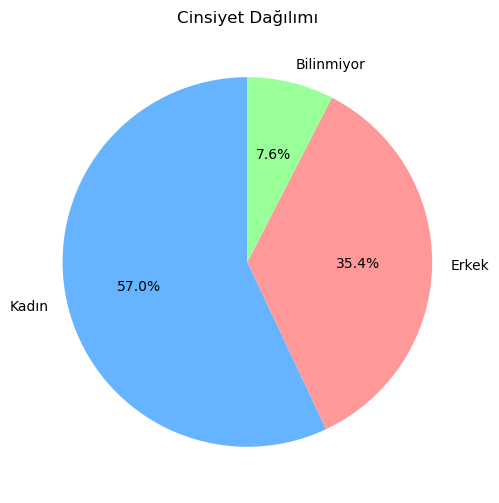

In [5134]:
cinsiyet_sayilari = df["Cinsiyet"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    cinsiyet_sayilari, 
    labels=cinsiyet_sayilari.index, 
    autopct="%1.1f%%", 
    startangle=90, 
    colors=["#66b3ff","#ff9999","#99ff99"]
)
plt.title("Cinsiyet Dağılımı")
plt.show()

In [5135]:
df = pd.get_dummies(df, columns=["Cinsiyet"], drop_first=True)

## 📝 Cinsiyet Sütunu Encoding İşlemi

- `Cinsiyet` sütunu üzerinde **One-Hot Encoding** uygulanmıştır.  
- `drop_first=True` parametresi kullanıldığı için, ilk kategori düşürülmüş ve referans sınıf olarak tutulmuştur.  
- Sonuç olarak aşağıdaki sütunlar oluşturulmuştur:  
  - `Cinsiyet_Erkek`  
  - `Cinsiyet_Kadın`  
- Bu sütunlarda değerler **True ve False** olarak kodlanmıştır.  
- Düşürülen kategori (`Bilinmiyor`), diğer sütunların değerlerinden dolaylı olarak çıkarılabilmektedir (**Cinsiyet_Erkek ve Cinsiyet_Kadın ikiside False ise Bilinmiyor oluyor**).  
- Böylece modelde gereksiz tekrar (dummy variable trap) engellenmiş ve değişken sayısı azaltılmıştır.  

# KanGrubu

In [5136]:
df["KanGrubu"].isna().sum()

np.int64(675)

- `KanGrubu` sütununda toplam **675 satırda eksik değer** bulunmaktadır.  
- Bu oran, 2235 satırlık veri setinin yaklaşık **%30,2**’sine denk gelmektedir.  
- Eksik oranı oldukça yüksek olduğu için, bu sütunun dikkatli ele alınması gerekir.

In [5137]:
len(df[df["KanGrubu"].isnull()]["HastaNo"].unique().tolist())

134

- **134** hastanın kan grubu yok.

In [5138]:
df[df["HastaNo"] == 145159]

,HastaNo,Yas,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,Cinsiyet_Erkek,Cinsiyet_Kadın
147,145159,53,0 Rh+,Türkiye,"Limb-Girdle Musküler Distrofi, Astım, Fasciosc...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA",Dorsalji 1,15 Seans,Bel,20 Dakika,False,True
148,145159,53,NaN,Türkiye,"Limb-Girdle Musküler Distrofi, Astım, Fasciosc...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA",Dorsalji 1,15 Seans,Bel,20 Dakika,False,True
149,145159,53,NaN,Türkiye,"Limb-Girdle Musküler Distrofi, Astım, Fasciosc...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA",Dorsalji 1,15 Seans,Bel,20 Dakika,False,True
150,145159,53,0 Rh+,Türkiye,"Limb-Girdle Musküler Distrofi, Astım, Fasciosc...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA",Dorsalji 1,15 Seans,Bel,20 Dakika,False,True
151,145159,53,0 Rh+,Türkiye,"Limb-Girdle Musküler Distrofi, Astım, Fasciosc...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA",Dorsalji 1,15 Seans,Bel,5 Dakika,False,True


In [5139]:
# Önce her HastaNo için bilinen KanGrubu değerini bulalım
kan_grubu_map = (
    df.dropna(subset=["KanGrubu"])
      .drop_duplicates("HastaNo")  # her HastaNo için tek değer kalsın
      .set_index("HastaNo")["KanGrubu"]
      .to_dict()
)

# Eksik KanGrubu olan satırları bu bilgilerle dolduralım
df["KanGrubu"] = df["KanGrubu"].fillna(df["HastaNo"].map(kan_grubu_map))

In [5140]:
len(df[df["KanGrubu"].isnull()]["HastaNo"].unique().tolist())

118

In [5141]:
df[df["HastaNo"] == 145159]

,HastaNo,Yas,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,Cinsiyet_Erkek,Cinsiyet_Kadın
147,145159,53,0 Rh+,Türkiye,"Limb-Girdle Musküler Distrofi, Astım, Fasciosc...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA",Dorsalji 1,15 Seans,Bel,20 Dakika,False,True
148,145159,53,0 Rh+,Türkiye,"Limb-Girdle Musküler Distrofi, Astım, Fasciosc...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA",Dorsalji 1,15 Seans,Bel,20 Dakika,False,True
149,145159,53,0 Rh+,Türkiye,"Limb-Girdle Musküler Distrofi, Astım, Fasciosc...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA",Dorsalji 1,15 Seans,Bel,20 Dakika,False,True
150,145159,53,0 Rh+,Türkiye,"Limb-Girdle Musküler Distrofi, Astım, Fasciosc...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA",Dorsalji 1,15 Seans,Bel,20 Dakika,False,True
151,145159,53,0 Rh+,Türkiye,"Limb-Girdle Musküler Distrofi, Astım, Fasciosc...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA",Dorsalji 1,15 Seans,Bel,5 Dakika,False,True


## 📝 Kan Grubu İmputasyon Sonuçları

- İmputasyon öncesinde, `KanGrubu` sütununda eksik değere sahip **134 farklı hasta** bulunmaktaydı.  
- Gruplama ve doldurma işlemleri sonrasında bu sayı **118 hastaya** düşmüştür.  
- Bu durum şu anlama gelmektedir:  
  - **134 - 118 = 16 hastada**, aslında kan grubu bilgisi diğer satırlarda mevcutmuş, ancak bazı satırlarda boş bırakılmış.  
  - Bu 16 hastanın eksik değerleri, aynı hastanın bilinen `KanGrubu` bilgisi kullanılarak doldurulmuştur.  
  - Geriye kalan **118 hasta** için ise tüm satırlarda `KanGrubu` bilgisi tamamen eksiktir, yani bu hastalarda imputasyon yapılamamıştır.  
- Böylece, eksik değerlerin bir kısmı **hasta bazında tutarlı şekilde doldurulmuş**, tamamen eksik olan hastalar ise ayrı bir kategori veya eksik değer olarak bırakılmıştır.  

In [5142]:
# Eğer hala NaN varsa onları "Bilinmiyor" yap
df["KanGrubu"] = df["KanGrubu"].fillna("Bilinmiyor")

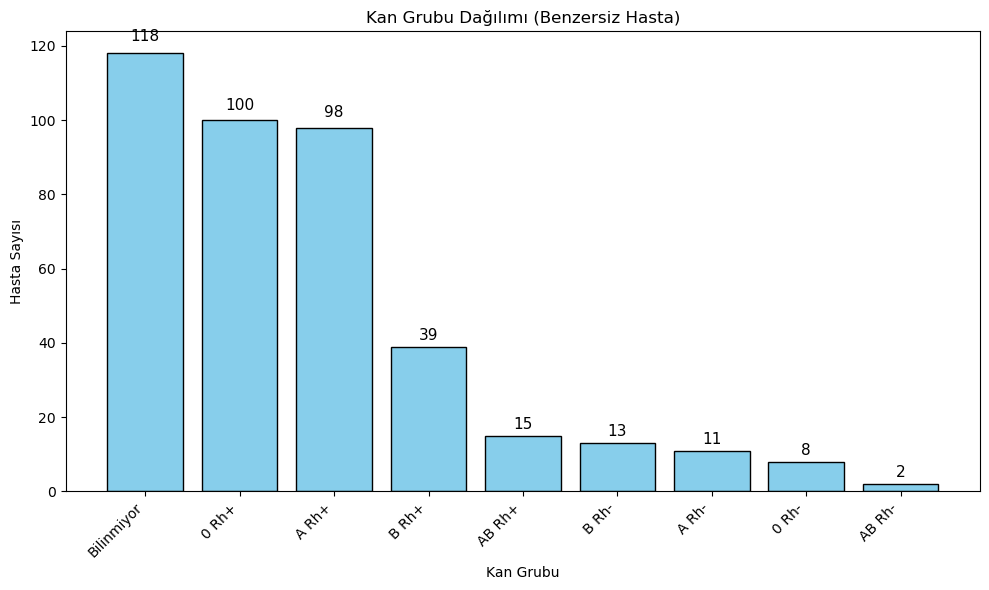

In [5143]:
# 1)  Hasta bazında tek kan grubu (ilk kayıt)
kan_grubu_hasta_sayilari = (
    df.groupby("HastaNo")["KanGrubu"]
      .first()
      .value_counts()
      .sort_values(ascending=False)
)


# 2) Çizim
plt.figure(figsize=(10,6))
bars = plt.bar(
    kan_grubu_hasta_sayilari.index,
    kan_grubu_hasta_sayilari.values,
    color="skyblue",
    edgecolor="black"
)

# Etiketleri çubuk tepesine yakın yaz
for bar in bars:
    yval = bar.get_height()
    offset = max(1, yval * 0.02)  # çok küçük/büyük değerlerde dengeli boşluk
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + offset,
        int(yval),
        ha="center",
        va="bottom",
        fontsize=11
    )

plt.title("Kan Grubu Dağılımı (Benzersiz Hasta)")
plt.xlabel("Kan Grubu")
plt.ylabel("Hasta Sayısı")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 📊 Çıkarımlar:
- En büyük grubu **"Bilinmiyor" (118 hasta)** oluşturmaktadır.  
- Bunu **0 Rh+ (100 hasta)** ve **A Rh+ (98 hasta)** takip etmektedir.  
- Daha az sayıda hastada ise diğer kan grupları gözlemlenmiştir:  
  - **B Rh+ : 39 hasta**  
  - **AB Rh+ : 15 hasta**  
  - **B Rh- : 13 hasta**  
  - **A Rh- : 11 hasta**  
  - **0 Rh- : 8 hasta**  
  - **AB Rh- : 2 hasta**  

### 🔎 Yorum:
- Veri setinde kan grubu bilgisinin **önemli bir kısmı eksiktir** (118 hasta, en büyük kategori).  
- Bilinenler içinde ise **pozitif gruplar** (özellikle `0 Rh+` ve `A Rh+`) baskındır.  
- Negatif gruplar oldukça az temsil edilmektedir.  

👉 Bu durum, kan grubu değişkeninin **eksik verilerle birlikte dikkatli ele alınması** gerektiğini göstermektedir. Bundan kaynaklı eksik değerleri dağılımı bozmamak adına **Bilinmiyor** ifadesi ile doldurduk.

In [5144]:
from pandas.api.types import CategoricalDtype

# Kategorileri özel sırayla tanımla
kan_kategoriler = ["Bilinmiyor", "0 Rh+", "A Rh+", "B Rh+", "AB Rh+", 
                   "0 Rh-", "A Rh-", "B Rh-", "AB Rh-"]

df["KanGrubu"] = df["KanGrubu"].astype(CategoricalDtype(categories=kan_kategoriler))

# One-Hot Encoding (Bilinmiyor referans olur)
df = pd.get_dummies(df, columns=["KanGrubu"], drop_first=True)

## 📝 Kan Grubu Sütunu Encoding İşlemi

- `KanGrubu` sütunundaki kategorik değerler, **One-Hot Encoding** yöntemiyle sayısal forma dönüştürülmüştür.  
- Eksik değerler `"Bilinmiyor"` kategorisi altında toplanmıştır.  
- `drop_first=True` parametresi kullanılarak, `"Bilinmiyor"` kategorisi referans sınıf olarak seçilmiş ve modelde yer almamıştır.  
- Sonuç olarak aşağıdaki sütunlar oluşturulmuştur:  
  - `KanGrubu_0 Rh+`  
  - `KanGrubu_A Rh+`  
  - `KanGrubu_B Rh+`  
  - `KanGrubu_AB Rh+`  
  - `KanGrubu_0 Rh-`  
  - `KanGrubu_A Rh-`  
  - `KanGrubu_B Rh-`  
  - `KanGrubu_AB Rh-`  
- Bu sütunlardaki değerler **True ve False** olarak tutulmaktadır.  
- Böylece model, `"Bilinmiyor"` kategorisini referans alarak diğer kan gruplarının etkisini tahmin edebilecek hale gelmiştir.  

In [5145]:
df

,HastaNo,Yas,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,...,Cinsiyet_Erkek,Cinsiyet_Kadın,KanGrubu_0 Rh+,KanGrubu_A Rh+,KanGrubu_B Rh+,KanGrubu_AB Rh+,KanGrubu_0 Rh-,KanGrubu_A Rh-,KanGrubu_B Rh-,KanGrubu_AB Rh-
0,145134,60,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,...,False,True,True,False,False,False,False,False,False,False
1,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,...,True,False,True,False,False,False,False,False,False,False
2,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",...,True,False,True,False,False,False,False,False,False,False
3,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,...,True,False,True,False,False,False,False,False,False,False
4,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,145536,48,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,...,True,False,False,False,False,False,False,False,False,False
2231,145536,48,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,...,True,False,False,False,False,False,False,False,False,False
2232,145537,33,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,​Algonörodistrofi,​ ay...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,...,False,True,False,True,False,False,False,False,False,False
2233,145537,33,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,...,False,True,False,True,False,False,False,False,False,False


# Uyruk

In [5146]:
df["Uyruk"].isna().sum()

np.int64(0)

In [5147]:
df["Uyruk"].unique()

array(['Türkiye', 'Tokelau', 'Azerbaycan', 'Libya', 'Arnavutluk'],
      dtype=object)

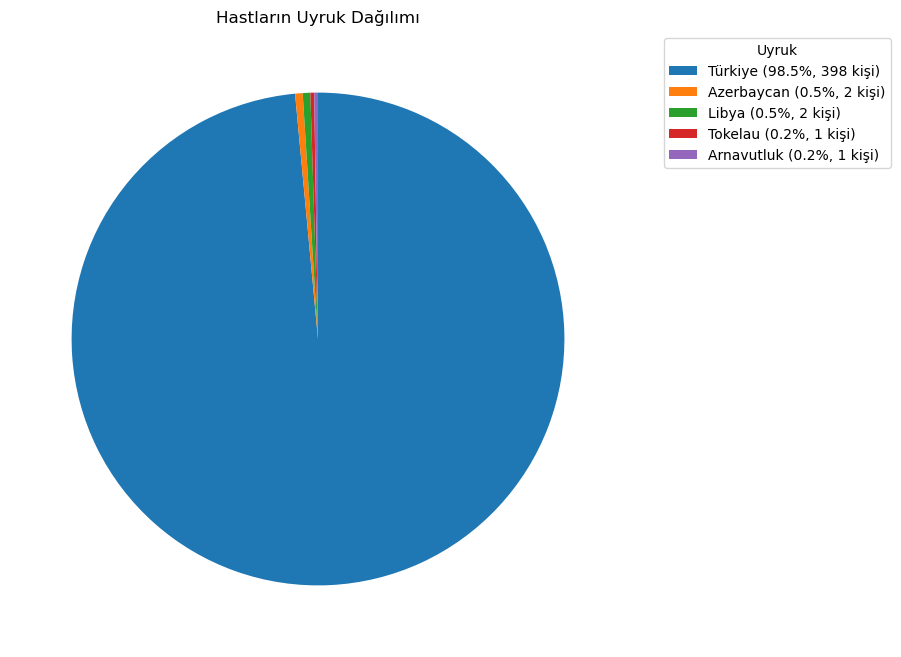

In [5148]:
# Hasta bazında benzersiz uyruk değerini al (tekrarları düşür) uyruk dağılımı (benzersiz hasta sayısına göre) 
uyruk_sayilari = df.groupby("HastaNo")["Uyruk"].first().value_counts()

plt.figure(figsize=(8,8))

# Pie chart 
plt.pie(
    uyruk_sayilari,
    startangle=90,
    counterclock=False
)

# Legend için özel etiketler: Uyruk (%yüzde, sayı)
total = uyruk_sayilari.sum()
labels = [f"{idx} ({val/total:.1%}, {val} kişi)" for idx, val in uyruk_sayilari.items()]

plt.legend(labels, title="Uyruk", bbox_to_anchor=(1.05, 1))
plt.title("Hastların Uyruk Dağılımı")
plt.show()

## 📝 Uyruk Dağılımı (Benzersiz Hasta Bazında)

- **Uyruk** sütununda eksik değer bulunmamaktadır.  
- Analiz her hasta için tekil olarak yapılmış ve tekrar eden kayıtlar dikkate alınmamıştır.  

### 📊 Çıkarımlar:
- **Türkiye**: %98.5 (**398 kişi**)  
- **Azerbaycan**: %0.5 (**2 kişi**)  
- **Libya**: %0.5 (**2 kişi**)  
- **Tokelau**: %0.2 (**1 kişi**)  
- **Arnavutluk**: %0.2 (**1 kişi**)  

### 🔎 Yorum:
- Veri setindeki hastaların çok büyük çoğunluğu (**neredeyse tamamı**) Türkiye uyrukludur.  
- Diğer ülkelerden gelen hastalar ise oldukça sınırlı sayıda olup, istatistiksel olarak düşük temsil edilmektedir.  
- Bu dağılım, modelin **uyruk değişkenini** öğrenirken Türkiye ağırlıklı bir dağılıma sahip olacağını göstermektedir.  

In [5149]:
df["Uyruk_Türkiye"] = df["Uyruk"].apply(lambda x: 1 if x == "Türkiye" else 0)

In [5150]:
df.head()

,HastaNo,Yas,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,...,Cinsiyet_Kadın,KanGrubu_0 Rh+,KanGrubu_A Rh+,KanGrubu_B Rh+,KanGrubu_AB Rh+,KanGrubu_0 Rh-,KanGrubu_A Rh-,KanGrubu_B Rh-,KanGrubu_AB Rh-,Uyruk_Türkiye
0,145134,60,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,...,True,True,False,False,False,False,False,False,False,1
1,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,...,False,True,False,False,False,False,False,False,False,1
2,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",...,False,True,False,False,False,False,False,False,False,1
3,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,...,False,True,False,False,False,False,False,False,False,1
4,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",...,False,True,False,False,False,False,False,False,False,1


## 🌍 Uyruk Değişkeninin Dönüştürülmesi

Veri setinde yer alan **Uyruk** değişkeni incelendiğinde, kayıtların %98,5’inin **Türkiye**, yalnızca %1,5’inin ise farklı ülkelere ait olduğu görülmüştür.  
Bu dengesiz dağılım nedeniyle One-Hot Encoding (OHE) kullanmak yerine, daha yalın bir yaklaşım olan **binary encoding** tercih edilmiştir.  

### Yapılan Dönüşüm
- **Türkiye** → `1`  
- **Diğer ülkeler** → `0`  

### Sonuç
Bu dönüşüm ile:
- Modelde gereksiz ek sütunların oluşması engellendi.  
- Az örnek içeren kategorilerin modele ek gürültü katmasının önüne geçildi.  
- Böylece **Uyruk** değişkeni, regresyon modeli için daha anlamlı ve sade bir forma dönüştürüldü.  

# KronikHastalık 

In [5151]:
df["KronikHastalik"].isna().sum()

np.int64(611)

In [5152]:
df.loc[df["KronikHastalik"].isna(), "HastaNo"].unique().tolist()

[145136,
 145141,
 145144,
 145154,
 145162,
 145165,
 145170,
 145173,
 145174,
 145179,
 145189,
 145191,
 145201,
 145202,
 145203,
 145205,
 145209,
 145211,
 145212,
 145214,
 145222,
 145225,
 145226,
 145228,
 145231,
 145232,
 145235,
 145237,
 145238,
 145244,
 145251,
 145259,
 145261,
 145262,
 145266,
 145269,
 145272,
 145278,
 145283,
 145288,
 145290,
 145293,
 145295,
 145296,
 145297,
 145298,
 145301,
 145303,
 145316,
 145318,
 145319,
 145327,
 145329,
 145330,
 145337,
 145349,
 145350,
 145356,
 145359,
 145360,
 145362,
 145364,
 145365,
 145367,
 145369,
 145370,
 145376,
 145377,
 145379,
 145380,
 145382,
 145385,
 145390,
 145391,
 145397,
 145406,
 145408,
 145411,
 145419,
 145424,
 145427,
 145431,
 145432,
 145439,
 145440,
 145443,
 145450,
 145455,
 145456,
 145460,
 145468,
 145469,
 145473,
 145476,
 145477,
 145479,
 145483,
 145485,
 145492,
 145493,
 145502,
 145507,
 145512,
 145513,
 145524,
 145527,
 145537]

In [5153]:
df.groupby("HastaNo")["KronikHastalik"].first().value_counts().head(15)

KronikHastalik
Myastenia gravis                                 8
Hipertiroidizm                                   7
Hipertansiyon                                    7
Fascioscapulohumeral Distrofi                    7
Aritmi                                           6
Becker Musküler Distrofisi                       6
Limb-Girdle Musküler Distrofi                    6
Kalp yetmezliği                                  6
Astım                                            6
Hiportiroidizm                                   5
Duchenne Musküler Distrofisi                     4
Limb-Girdle Musküler Distrofi, Astım             4
Diyabet                                          4
Polimiyozit                                      3
Limb-Girdle Musküler Distrofi, Hipertiroidizm    3
Name: count, dtype: int64

In [5154]:
df.groupby("HastaNo")["KronikHastalik"].apply(lambda x: x.isna().all()).loc[lambda s: s].index.tolist()

[145136,
 145141,
 145144,
 145162,
 145165,
 145170,
 145173,
 145174,
 145179,
 145189,
 145191,
 145201,
 145202,
 145203,
 145205,
 145209,
 145211,
 145212,
 145214,
 145222,
 145225,
 145226,
 145228,
 145231,
 145232,
 145235,
 145237,
 145238,
 145244,
 145251,
 145259,
 145261,
 145262,
 145266,
 145269,
 145272,
 145278,
 145283,
 145288,
 145290,
 145293,
 145295,
 145296,
 145297,
 145298,
 145301,
 145303,
 145316,
 145318,
 145319,
 145327,
 145329,
 145330,
 145337,
 145349,
 145350,
 145356,
 145359,
 145360,
 145362,
 145364,
 145365,
 145367,
 145369,
 145370,
 145376,
 145377,
 145379,
 145380,
 145382,
 145385,
 145390,
 145391,
 145397,
 145406,
 145408,
 145411,
 145419,
 145424,
 145427,
 145431,
 145432,
 145439,
 145440,
 145443,
 145450,
 145455,
 145456,
 145460,
 145468,
 145469,
 145473,
 145476,
 145477,
 145479,
 145483,
 145485,
 145492,
 145493,
 145502,
 145507,
 145512,
 145513,
 145524,
 145527,
 145537]

In [5155]:
df.loc[df["KronikHastalik"].isna() & df["HastaNo"].map(kronik_map).notna(), "HastaNo"].unique().tolist()


[145154]

### Kronik Hastalık Eksik Verilerinin Doldurulması

- Veri setinde **KronikHastalık** sütununda bazı eksik değerler tespit edilmiştir.  
- Eksik değerlerin doldurulmasında şu strateji uygulanmıştır:  
  - Aynı **HastaNo** için başka satırlarda kronik hastalık bilgisi varsa, bu bilgi eksik satırlara aktarılmıştır.  
  - Eğer bir hastanın hiçbir kaydında kronik hastalık bilgisi yoksa, bu değer **"Bilinmiyor"** olarak doldurulmuştur.  

- Bu işlem sonucunda, eksik değere sahip olan hastalardan biri olan **HastaNo: 145154**, kendi kayıtlarındaki mevcut bilgi ile doldurulmuştur.  

👉 Böylece, veri kaybı önlenmiş ve modelleme sürecinde eksik verilerin yaratabileceği sorunlar en aza indirilmiştir.

In [5156]:
kronik_map = (
    df.dropna(subset=["KronikHastalik"])
      .drop_duplicates("HastaNo")
      .set_index("HastaNo")["KronikHastalik"]
      .to_dict()
)
df["KronikHastalik"] = df["KronikHastalik"].fillna(df["HastaNo"].map(kronik_map))
df["KronikHastalik"] = df["KronikHastalik"].fillna("Bilinmiyor")

## 📝 Kronik Hastalık Sütunu Analizi

- Veri setinde **kronik hastalık bilgisi** hasta bazında incelenmiştir.  
- Eksik değerler `"Bilinmiyor"` kategorisi ile doldurulmuştur.  
- Aşağıda hasta bazında en sık görülen kronik hastalıkların dağılımı yer almaktadır:  

| Kronik Hastalık                        | Hasta Sayısı |
|----------------------------------------|--------------|
| Bilinmiyor                             | 106          |
| Myastenia gravis                        | 8            |
| Hipertansiyon                           | 7            |
| Hipertiroidizm                          | 7            |
| Fascioscapulohumeral Distrofi           | 7            |
| Limb-Girdle Musküler Distrofi           | 6            |
| Becker Musküler Distrofisi              | 6            |
| Astım                                   | 6            |
| Kalp yetmezliği                         | 6            |
| Aritmi                                  | 6            |
| Hiportiroidizm                          | 5            |
| Diyabet                                 | 4            |
| Duchenne Musküler Distrofisi            | 4            |
| L.G. Musküler Distrofi, Astım           | 4            |
| L.G. Musküler Distrofi, Hipertiroidizm  | 3            |

- Görüldüğü üzere en yüksek oranda **“Bilinmiyor” (106 hasta)** bulunmakta, ardından **Myastenia gravis (8 hasta)** ve **Hipertansiyon (7 hasta)** gelmektedir.  
- Çok nadir görülen kronik hastalıklar (ör. 3–4 hastada görülenler) ileride modelleme aşamasında **“Diğer”** kategorisi altında toplanabilir.  

In [5157]:
df[df["HastaNo"] == 145154]

,HastaNo,Yas,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,...,Cinsiyet_Kadın,KanGrubu_0 Rh+,KanGrubu_A Rh+,KanGrubu_B Rh+,KanGrubu_AB Rh+,KanGrubu_0 Rh-,KanGrubu_A Rh-,KanGrubu_B Rh-,KanGrubu_AB Rh-,Uyruk_Türkiye
117,145154,53,Türkiye,Hipertansiyon,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Menisküs yırtığı, şimdiki",MENİSKÜS TAMİRİ,15 Seans,Diz,...,False,True,False,False,False,False,False,False,False,1
118,145154,53,Türkiye,Hipertansiyon,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Menisküs yırtığı, şimdiki",MENİSKÜS TAMİRİ,15 Seans,Diz,...,False,True,False,False,False,False,False,False,False,1
119,145154,53,Türkiye,Hipertansiyon,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Menisküs yırtığı, şimdiki",MENİSKÜS TAMİRİ,15 Seans,Diz,...,False,True,False,False,False,False,False,False,False,1
120,145154,53,Türkiye,Hipertansiyon,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Menisküs yırtığı, şimdiki",MENİSKÜS TAMİRİ,15 Seans,Diz,...,False,True,False,False,False,False,False,False,False,1
121,145154,53,Türkiye,Hipertansiyon,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Menisküs yırtığı, şimdiki",MENİSKÜS TAMİRİ,15 Seans,Diz,...,False,True,False,False,False,False,False,False,False,1
122,145154,53,Türkiye,Hipertansiyon,Ortopedi Ve Travmatoloji,NaN,Medial menisküsün posterior boynuzunun diğer y...,"Diz Menisküs,",4 Seans,Tüm Vücut Bölgesi,...,False,True,False,False,False,False,False,False,False,1
123,145154,53,Türkiye,Hipertansiyon,Ortopedi Ve Travmatoloji,NaN,Medial menisküsün posterior boynuzunun diğer y...,"Diz Menisküs,",4 Seans,NaN,...,False,True,False,False,False,False,False,False,False,1


## 📝 Kronik Hastalık Sütunu Eksik Değer Analizi

- `KronikHastalik` sütununda eksik değerler tespit edilmiştir.  
- Aynı hastanın diğer kayıtlarında kronik hastalık bilgisi varsa, bu değer eksik kayıtlara aktarılmıştır.  
- Hiçbir kaydında bilgi bulunmayan hastalar için ise değer **"Bilinmiyor"** olarak doldurulmuştur.  
- Böylece sütunda eksik değer sorunu ortadan kaldırılmış ve veri seti modelleme için daha tutarlı hale getirilmiştir.

In [5158]:
# ===  Ayrıştır (multi-label) ===
df_k = df.assign(Kronik_split=df["KronikHastalik"].astype(str).str.split(",")) \
         .explode("Kronik_split")

# ===  Temizle + kanonik isimlere indir ===
df_k["Kronik_split"] = df_k["Kronik_split"].astype(str).str.strip().map(canonize)
df_k = df_k[df_k["Kronik_split"].ne("")]

# ===  Nadirleri "diger" altında topla ===
THRESH = 5
freq = df_k["Kronik_split"].value_counts()
rare_idx = freq[freq < THRESH].index
df_k.loc[df_k["Kronik_split"].isin(rare_idx) & df_k["Kronik_split"].ne("bilinmiyor"), "Kronik_split"] = "diger"

# ===  One-Hot (multi-hot) → bool sütunlar
ohe = pd.get_dummies(df_k["Kronik_split"], prefix="Kronik", dtype=bool)

# Hasta bazında birleştir → any() bool için daha uygun
df_k_ohe = pd.concat([df_k[["HastaNo"]], ohe], axis=1) \
             .groupby("HastaNo", as_index=False).any()

# ===  Eski Kronik_* sütunlarını temizle + yeni OHE'yi merge et
old_k_cols = [c for c in df.columns if c.startswith("Kronik_")]
df = df.drop(columns=old_k_cols, errors="ignore") \
       .merge(df_k_ohe, on="HastaNo", how="left")

# NaN → False (bool tipini koruyarak)
new_k_cols = [c for c in df.columns if c.startswith("Kronik_")]
df[new_k_cols] = df[new_k_cols].fillna(False).astype(bool)

# ===  Kontrol
print("Kronik OHE sütunları:", new_k_cols)
print(df[new_k_cols].sum().sort_values(ascending=False).head(15))

Kronik OHE sütunları: ['Kronik_aritmi', 'Kronik_astm', 'Kronik_becker muskuler distrofisi', 'Kronik_bilinmiyor', 'Kronik_diger', 'Kronik_diyabet', 'Kronik_duchenne muskuler distrofisi', 'Kronik_fshd', 'Kronik_hipertansiyon', 'Kronik_hipertiroidizm', 'Kronik_hipotiroidizm', 'Kronik_kalp yetmezligi', 'Kronik_lgmd', 'Kronik_myastenia gravis', 'Kronik_polimiyozit']
Kronik_bilinmiyor                      606
Kronik_aritmi                          399
Kronik_hipotiroidizm                   383
Kronik_lgmd                            379
Kronik_astm                            353
Kronik_hipertiroidizm                  332
Kronik_myastenia gravis                318
Kronik_diyabet                         317
Kronik_duchenne muskuler distrofisi    307
Kronik_fshd                            304
Kronik_kalp yetmezligi                 303
Kronik_hipertansiyon                   302
Kronik_polimiyozit                     275
Kronik_becker muskuler distrofisi      243
Kronik_diger                      

# Bolum

In [5159]:
df["Bolum"].isna().sum()

np.int64(11)

In [5160]:
eksik_bolum_hastalar = df.loc[df["Bolum"].isna(), "HastaNo"].unique().tolist()
print("Eksik Bolum bilgisine sahip hasta sayısı:", len(eksik_bolum_hastalar))
print("Hasta Numaraları:", eksik_bolum_hastalar)

Eksik Bolum bilgisine sahip hasta sayısı: 1
Hasta Numaraları: [145157]


In [5161]:
df[df["HastaNo"] == 145157]

,HastaNo,Yas,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,...,Kronik_diyabet,Kronik_duchenne muskuler distrofisi,Kronik_fshd,Kronik_hipertansiyon,Kronik_hipertiroidizm,Kronik_hipotiroidizm,Kronik_kalp yetmezligi,Kronik_lgmd,Kronik_myastenia gravis,Kronik_polimiyozit
131,145157,59,Türkiye,"Hipertiroidizm, Aritmi",NaN,NaN,"Baş ağrısı, diğer sendromları",Parapleji-Tetrapleji,30 Seans,NaN,...,False,False,False,False,True,False,False,False,False,False
132,145157,59,Türkiye,"Hipertiroidizm, Aritmi",NaN,NaN,"Baş ağrısı, diğer sendromları",Parapleji-Tetrapleji,30 Seans,NaN,...,False,False,False,False,True,False,False,False,False,False
133,145157,59,Türkiye,"Hipertiroidizm, Aritmi",NaN,NaN,"Baş ağrısı, diğer sendromları",Parapleji-Tetrapleji,30 Seans,Tüm Vücut Bölgesi,...,False,False,False,False,True,False,False,False,False,False
134,145157,59,Türkiye,"Hipertiroidizm, Aritmi",NaN,NaN,"Baş ağrısı, diğer sendromları",Parapleji-Tetrapleji,30 Seans,NaN,...,False,False,False,False,True,False,False,False,False,False
135,145157,59,Türkiye,"Hipertiroidizm, Aritmi",NaN,NaN,"Baş ağrısı, diğer sendromları",Dorsalji-Bel+ Eklem ağrsıı,20 Seans,Bel,...,False,False,False,False,True,False,False,False,False,False
136,145157,59,Türkiye,"Hipertiroidizm, Aritmi",NaN,NaN,"Baş ağrısı, diğer sendromları",Dorsalji-Bel+ Eklem ağrsıı,20 Seans,Bel,...,False,False,False,False,True,False,False,False,False,False
137,145157,59,Türkiye,"Hipertiroidizm, Aritmi",NaN,NaN,"Baş ağrısı, diğer sendromları",Dorsalji-Bel+ Eklem ağrsıı,20 Seans,Bel,...,False,False,False,False,True,False,False,False,False,False
138,145157,59,Türkiye,"Hipertiroidizm, Aritmi",NaN,NaN,"Baş ağrısı, diğer sendromları",Dorsalji-Bel+ Eklem ağrsıı,20 Seans,Bel,...,False,False,False,False,True,False,False,False,False,False
139,145157,59,Türkiye,"Hipertiroidizm, Aritmi",NaN,NaN,"Baş ağrısı, diğer sendromları",Dorsalji-Bel+ Eklem ağrsıı,20 Seans,Bel,...,False,False,False,False,True,False,False,False,False,False
140,145157,59,Türkiye,"Hipertiroidizm, Aritmi",NaN,NaN,"Baş ağrısı, diğer sendromları",Dorsalji-Bel+ Eklem ağrsıı,20 Seans,NaN,...,False,False,False,False,True,False,False,False,False,False


In [5162]:
df.drop(df[df["HastaNo"] == 145157].index, inplace=True)

- Tek bir hastanın hiçbir kayıdında bolum değeri olmadığından sildik.

In [5163]:
df["Bolum"].value_counts().head(10)

Bolum
Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    2045
Ortopedi Ve Travmatoloji                            88
İç Hastalıkları                                     32
Nöroloji                                            17
Kardiyoloji                                         11
Göğüs Hastalıkları                                   8
Laboratuar                                           7
Genel Cerrahi                                        6
Tıbbi Onkoloji                                       6
Kalp Ve Damar Cerrahisi                              4
Name: count, dtype: int64

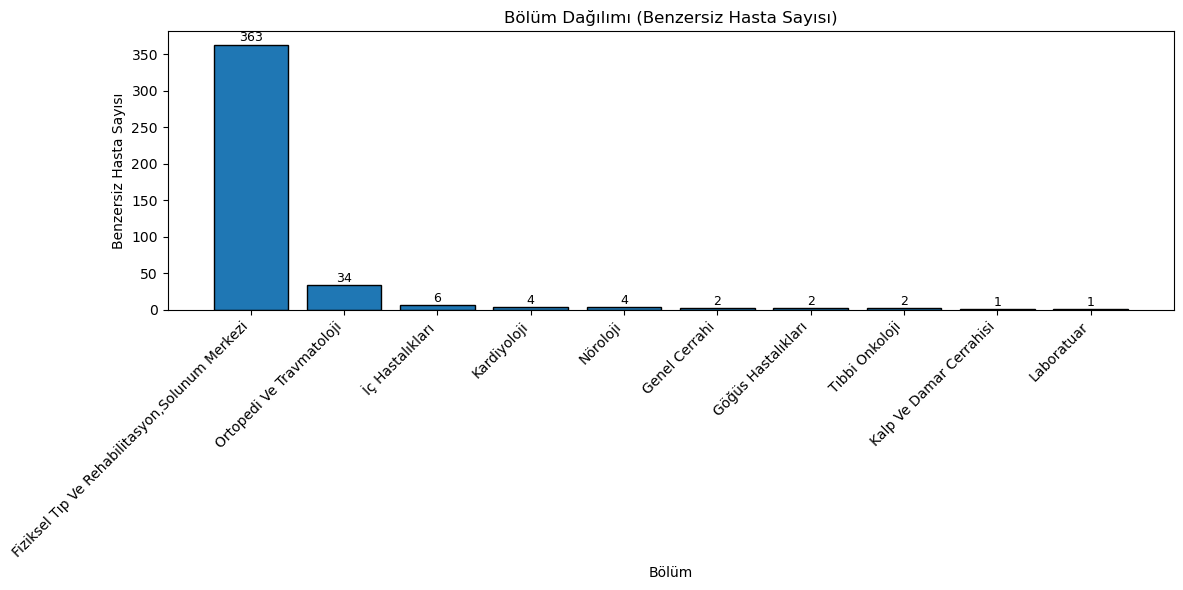

In [5164]:
#  Bölüm bazında benzersiz hasta sayısı
bolum_counts = df.groupby("Bolum")["HastaNo"].nunique().sort_values(ascending=False)

#  Çizim
plt.figure(figsize=(12,6))
bars = plt.bar(bolum_counts.index, bolum_counts.values, edgecolor="black")

for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, y + 0.3, int(y), ha="center", va="bottom", fontsize=9)

plt.title("Bölüm Dağılımı (Benzersiz Hasta Sayısı)")
plt.xlabel("Bölüm")
plt.ylabel("Benzersiz Hasta Sayısı")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 📝 Bölüm Dağılımı 

Veri setindeki kayıtlar **hastaların işlem gördüğü bölümlere** göre incelendiğinde, en fazla kayıt **Fiziksel Tıp ve Rehabilitasyon, Solunum Merkezi** bölümünde toplanmıştır.  

### 📊 Bulgular:
- **Fiziksel Tıp ve Rehabilitasyon, Solunum Merkezi** → 363 kayıt  
- **Ortopedi ve Travmatoloji** → 34 kayıt  
- **İç Hastalıkları** → 6 kayıt  
- **Kardiyoloji** → 4 kayıt  
- **Nöroloji** → 4 kayıt  
- **Tıbbi Onkoloji** → 2 kayıt  
- **Kalp ve Damar Cerrahisi** → 1 kayıt  
- **Genel Cerrahi** → 2 kayıt  
- **Göğüs Hastalıkları** → 2 kayıt  
- **Laboratuar** → 1 kayıt

### 🔎 Yorum:
- Kayıtların **büyük çoğunluğu (%85’in üzerinde)** **Fiziksel Tıp ve Rehabilitasyon, Solunum Merkezi** bölümünde yoğunlaşmıştır.  
- Diğer bölümler ise oldukça az sayıda kayıtla temsil edilmektedir.  
- Bu durum, veri setinin odak noktasının esasen **rehabilitasyon ve solunum** alanı olduğunu göstermektedir.  

In [5165]:
# Nadir bölümleri 'Diger' kategorisine ata
bolum_counts = df["Bolum"].value_counts()
rare_bolum = bolum_counts[bolum_counts < 20].index
df["Bolum"] = df["Bolum"].replace(rare_bolum, "Diger")

# OHE sütunlarını ayrı oluştur
bolum_ohe = pd.get_dummies(df["Bolum"], prefix="Bolum", drop_first=True)

# OHE sütunlarını df'e ekle (orijinal 'Bolum' kalsın)
df = pd.concat([df, bolum_ohe], axis=1)

In [5166]:
df

,HastaNo,Yas,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,...,Kronik_hipertansiyon,Kronik_hipertiroidizm,Kronik_hipotiroidizm,Kronik_kalp yetmezligi,Kronik_lgmd,Kronik_myastenia gravis,Kronik_polimiyozit,"Bolum_Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Bolum_Ortopedi Ve Travmatoloji,Bolum_İç Hastalıkları
0,145134,60,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,...,False,False,True,True,False,False,False,True,False,False
1,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,...,True,False,False,False,False,True,False,True,False,False
2,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",...,True,False,False,False,False,True,False,True,False,False
3,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,...,True,False,False,False,False,True,False,True,False,False
4,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,145536,48,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,...,False,False,True,False,False,True,False,True,False,False
2231,145536,48,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,...,False,False,True,False,False,True,False,True,False,False
2232,145537,33,Türkiye,Bilinmiyor,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,​Algonörodistrofi,​ ay...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,...,False,False,False,False,False,False,False,True,False,False
2233,145537,33,Türkiye,Bilinmiyor,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,...,False,False,False,False,False,False,False,True,False,False


# Alerji

In [5167]:
df["Alerji"].isna().sum()

np.int64(933)

In [5168]:
len(df.groupby("HastaNo")["Alerji"].apply(lambda x: x.isna().all()).loc[lambda s: s].index.tolist())

160

- **160** hastanın `Alerji` değeri yok.

In [5169]:
df.groupby("HastaNo")["Alerji"].apply(lambda x: x.isna().all()).loc[lambda s: s].index.tolist()

[145135,
 145138,
 145139,
 145140,
 145143,
 145144,
 145145,
 145147,
 145149,
 145150,
 145151,
 145153,
 145154,
 145158,
 145159,
 145164,
 145167,
 145168,
 145170,
 145171,
 145172,
 145175,
 145177,
 145178,
 145179,
 145184,
 145185,
 145188,
 145193,
 145195,
 145200,
 145202,
 145203,
 145206,
 145208,
 145211,
 145213,
 145215,
 145216,
 145218,
 145222,
 145224,
 145227,
 145230,
 145231,
 145234,
 145236,
 145239,
 145240,
 145242,
 145243,
 145246,
 145247,
 145248,
 145249,
 145250,
 145251,
 145253,
 145254,
 145258,
 145259,
 145260,
 145262,
 145265,
 145267,
 145268,
 145274,
 145275,
 145277,
 145279,
 145280,
 145289,
 145291,
 145293,
 145295,
 145298,
 145301,
 145305,
 145309,
 145314,
 145316,
 145321,
 145327,
 145329,
 145330,
 145331,
 145335,
 145336,
 145340,
 145343,
 145346,
 145347,
 145349,
 145351,
 145354,
 145360,
 145362,
 145363,
 145365,
 145366,
 145369,
 145377,
 145379,
 145382,
 145391,
 145393,
 145408,
 145409,
 145412,
 145413,
 145414,
 

In [5170]:
df[df["HastaNo"] == 145526]

,HastaNo,Yas,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,...,Kronik_hipertansiyon,Kronik_hipertiroidizm,Kronik_hipotiroidizm,Kronik_kalp yetmezligi,Kronik_lgmd,Kronik_myastenia gravis,Kronik_polimiyozit,"Bolum_Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Bolum_Ortopedi Ve Travmatoloji,Bolum_İç Hastalıkları
2176,145526,45,Türkiye,"Astım, Diyabet, Limb-Girdle Musküler Distrofi,...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA,...",Dorsalji-Bel,15 Seans,Bel,...,False,False,False,False,True,False,False,True,False,False
2177,145526,45,Türkiye,"Astım, Diyabet, Limb-Girdle Musküler Distrofi,...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA,...",Dorsalji-Bel,15 Seans,Bel,...,False,False,False,False,True,False,False,True,False,False
2178,145526,45,Türkiye,"Astım, Diyabet, Limb-Girdle Musküler Distrofi,...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA,...",Dorsalji-Bel,15 Seans,Bel,...,False,False,False,False,True,False,False,True,False,False
2179,145526,45,Türkiye,"Astım, Diyabet, Limb-Girdle Musküler Distrofi,...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA,...",Dorsalji-Bel,15 Seans,Bel,...,False,False,False,False,True,False,False,True,False,False
2180,145526,45,Türkiye,"Astım, Diyabet, Limb-Girdle Musküler Distrofi,...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"DORSALJİ, DİĞER, BİRDEN FAZLA YER, VERTEBRADA,...",Dorsalji-Bel,15 Seans,Bel,...,False,False,False,False,True,False,False,True,False,False


In [5171]:
df["Alerji"].value_counts()

Alerji
Polen                198
POLEN                134
Toz                  119
ARVELES,CORASPIN     102
Sucuk                 91
NOVALGIN              90
Polen,Yer Fıstığı     83
TOZ                   74
SUCUK                 73
Novalgin              49
GRİPİN                47
Volteren              30
Voltaren              26
GRIPIN                22
VOLTAREN              19
POLEN,TOZ             13
VOLTAREN,Polen        11
Toz,TOZ                9
TOZ,Novalgin           7
Polen,NOVALGIN         7
Novalgin,Polen         6
TOZ,VOLTAREN           5
Voltaren,POLEN         5
Polen,GRIPIN           5
POLEN,Voltaren         5
NOVALGIN,Polen         5
VOLTAREN,POLEN         5
Volteren,GRİPİN        5
TOZ,POLEN              5
Polen,TOZ              5
Novalgin,Sucuk         5
SUCUK,GRIPIN           5
NOVALGIN,Novalgin      5
Polen,Toz              5
VOLTAREN,Toz           5
Polen,Voltaren         5
TOZ,GRİPİN             3
POLEN,NOVALGIN         3
Name: count, dtype: int64

In [5172]:
# Eksik değerleri 'yok' ile doldur
df["Alerji"] = df["Alerji"].fillna("yok")

# Unicode normalize + küçük harf
def normalize_text(s):
    s = unicodedata.normalize("NFKD", s)
    s = s.encode("ascii", "ignore").decode("utf-8")
    return s.lower().strip()

df["Alerji_norm"] = df["Alerji"].astype(str).apply(normalize_text)

# Mapping sözlüğü (yazım hatalarını düzelt)
mapping = {
    "volteren": "voltaren",
    "gri̇pi̇n": "gripin",   # unicode i sorunu
    "gripin": "gripin",
}

def clean_allergy(val):
    # parçala
    items = [mapping.get(x.strip(), x.strip()) for x in val.split(",") if x.strip()]
    # tekrar edenleri sil
    items = list(set(items))
    # alfabetik sırala
    return ",".join(sorted(items)) if items else "yok"

df["Alerji"] = df["Alerji_norm"].apply(clean_allergy)

# Kontrol için en sık geçenleri görelim
print(df["Alerji"].value_counts().head(30))

Alerji
yok                 933
polen               332
toz                 202
sucuk               164
novalgin            144
arveles,coraspin    102
polen,yer fstg       83
voltaren             75
gripin               69
polen,voltaren       31
polen,toz            28
novalgin,polen       21
toz,voltaren         10
novalgin,toz          7
gripin,sucuk          5
novalgin,sucuk        5
gripin,polen          5
gripin,voltaren       5
gripin,toz            3
Name: count, dtype: int64


## 📝 Alerji Sütunu Temizleme ve Dönüştürme

- `Alerji` sütununda farklı yazımlardan kaynaklanan tekrarlar ve hatalı değerler bulunmaktaydı.  
  - Örneğin: `Volteren` → `Voltaren`, `GRİPİN` → `gripin`, `toz,toz` → `toz`.  
- Tüm değerler küçük harfe dönüştürülmüş, Unicode normalizasyonu uygulanmış ve yazım hataları **mapping sözlüğü** ile düzeltilmiştir.  
- Birden fazla alerjisi olan kişilerde sıralama ve tekrar farkları giderilerek standartlaştırma yapılmıştır.  
  - Örn: `polen,novalgin` ve `novalgin,polen` → `novalgin,polen`  
- Eksik değerler `"yok"` kategorisi ile doldurulmuştur.  
- Sonuç olarak `Alerji_clean` sütunu, her hasta için temizlenmiş ve tutarlı alerji bilgisi içermektedir.  

In [5173]:
df.groupby("HastaNo")["Alerji"].first().value_counts()

Alerji
yok                 160
polen                57
toz                  43
sucuk                30
novalgin             30
arveles,coraspin     17
polen,yer fstg       16
gripin               14
voltaren             12
polen,voltaren        6
novalgin,polen        5
polen,toz             5
toz,voltaren          2
novalgin,toz          1
gripin,toz            1
gripin,sucuk          1
novalgin,sucuk        1
gripin,polen          1
gripin,voltaren       1
Name: count, dtype: int64

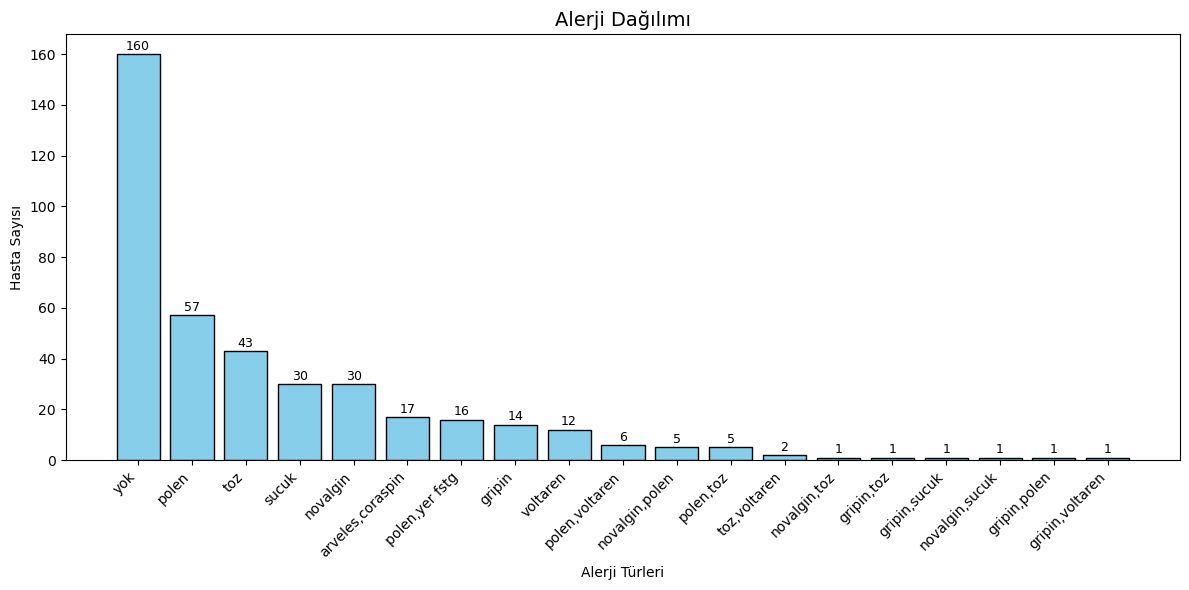

In [5174]:
# Hasta bazlı ilk alerji bilgisi
alerji_counts = df.groupby("HastaNo")["Alerji"].first().value_counts()

plt.figure(figsize=(12,6))
bars = plt.bar(alerji_counts.index, alerji_counts.values, color="skyblue", edgecolor="black")

# Çubukların üzerine sayıları yazdıralım
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, 
             ha="center", va="bottom", fontsize=9)

plt.title("Alerji Dağılımı", fontsize=14)
plt.xlabel("Alerji Türleri")
plt.ylabel("Hasta Sayısı")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 📝 Alerji Dağılımı 

- Alerji sütununda **her hasta için ilk kaydedilen bilgi** dikkate alınarak dağılım çıkarılmıştır.  
- Toplamda **160** hastada herhangi bir alerji kaydı bulunmamaktadır.  
- En sık görülen alerjiler aşağıda listelenmiştir:  

### 📊 Bulgular:
- **Alerji Yok**: 160 hasta  
- **Polen**: 57 hasta  
- **Toz**: 43 hasta  
- **Sucuk**: 30 hasta  
- **Novalgin**: 30 hasta  
- **Arveles, Coraspin**: 17 hasta  
- **Polen, Yer fıstığı**: 16 hasta  
- **Gripin**: 14 hasta  
- **Voltaren**: 12 hasta  
- **Polen + Voltaren**: 6 hasta  
- **Novalgin + Polen**: 5 hasta  
- **Polen + Toz**: 5 hasta  
- Daha nadir kombinasyonlar (ör. `toz+voltaren`, `gripin+sucuk`, `novalgin+toz`) yalnızca 1–2 hastada görülmektedir.  

### 🔎 Yorum:
- En yaygın alerjiler **polen, toz ve ilaç alerjileri (Novalgin, Voltaren, Gripin)** olarak öne çıkmaktadır.  
- Bazı hastalarda birden fazla alerji aynı anda bulunmaktadır.  
- Alerji bilgisi bulunmayan hasta sayısı da oldukça yüksektir (**160 kişi**). Bu grup, “alerjisi yok” veya “kayıt edilmemiş” olarak değerlendirilebilir.  

In [5175]:
# 1) explode + temizleme 
df_exploded = df.assign(Alerji_split=df["Alerji_norm"].str.split(",")).explode("Alerji_split")
df_exploded["Alerji_split"] = df_exploded["Alerji_split"].astype(str).str.strip()
df_exploded = df_exploded[(df_exploded["Alerji_split"]!="") & (df_exploded["Alerji_split"].str.lower()!="yok")]

# 2) One-Hot
ohe = pd.get_dummies(df_exploded["Alerji_split"], prefix="Alerji", dtype=bool)

# 3) Hasta bazında birleştir – bool için .any() daha doğal
df_ohe = pd.concat([df_exploded[["HastaNo"]], ohe], axis=1).groupby("HastaNo", as_index=False).any()

# 4) Eski sütunları temizle + merge
old_cols = [c for c in df.columns if c.startswith("Alerji_")]
df = df.drop(columns=old_cols, errors="ignore").merge(df_ohe, on="HastaNo", how="left")

# 5) NaN → False (bool tipini koruyarak)
new_cols = [c for c in df.columns if c.startswith("Alerji_")]
df[new_cols] = df[new_cols].fillna(False).astype(bool)

/var/folders/yf/rds_m3nj71s_qfh7c9cx8yy40000gn/T/ipykernel_38170/2114904884.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[new_cols] = df[new_cols].fillna(False).astype(bool)


## 📝 Alerji Sütunu One-Hot Encoding (Nadir Değerler "Diğer" Olarak Gruplandı)

- `Alerji` sütununda birden fazla değer bulunduğundan **multi-label One-Hot Encoding** uygulanmıştır.  
- Öncelikle sütundaki yazım hataları ve tekrarlar düzeltilmiş, ardından `Alerji_norm` sütunu oluşturulmuştur.  
- Her alerji türü için ayrı sütunlar açılmıştır (`Alerji_polen`, `Alerji_toz`, `Alerji_novalgin`, `Alerji_voltaren`, `Alerji_gripin` vb.).  
- **5’ten az sayıda görülen alerjiler**, tek tek sütun açmak yerine **`Alerji_Diğer`** başlığı altında toplanmıştır.  
- Hasta ilgili alerjiye sahipse sütunda **True**, sahip değilse **False** değeri yer almaktadır.  
- Eğer hastada hiç alerji kaydı yoksa, tüm `Alerji_` sütunlarında değer **False** olarak tutulmaktadır.  
- Bu yöntem sayesinde nadir görülen değerlerin modele **gürültü katması engellenmiş**, modelin genelleme gücü artırılmıştır.  

In [5176]:
df.head(10)

,HastaNo,Yas,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,...,Alerji_arveles,Alerji_coraspin,Alerji_gripin,Alerji_novalgin,Alerji_polen,Alerji_sucuk,Alerji_toz,Alerji_voltaren,Alerji_volteren,Alerji_yer fstg
0,145134,60,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",toz,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,...,False,False,False,False,False,False,True,False,False,False
1,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,...,False,False,False,False,False,False,False,False,False,False
2,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",...,False,False,False,False,False,False,False,False,False,False
3,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,...,False,False,False,False,False,False,False,False,False,False
4,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",...,False,False,False,False,False,False,False,False,False,False
5,145135,28,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,...,False,False,False,False,False,False,False,False,False,False
6,145136,60,Türkiye,Bilinmiyor,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","novalgin,polen",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,...,False,False,False,True,True,False,False,False,False,False
7,145136,60,Türkiye,Bilinmiyor,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","novalgin,polen",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,...,False,False,False,True,True,False,False,False,False,False
8,145136,60,Türkiye,Bilinmiyor,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","novalgin,polen",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,...,False,False,False,True,True,False,False,False,False,False
9,145137,65,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Dis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",novalgin,"Artroz, tanımlanmamış, el",El rehabilitasyonu,15 Seans,Sol El Bilek Bölgesi,...,False,False,False,True,False,False,False,False,False,False


# Tanilar

In [5177]:
df["Tanilar"].isna().sum()

np.int64(75)

In [5178]:
df["Tanilar"].value_counts()

Tanilar
DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE                                                                      149
Omuzun darbe sendromu                                                                                   128
İntervertebral disk bozuklukları, tanımlanmamış                                                         116
DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE                                                                    96
Eklem ağrısı                                                                                             51
                                                                                                       ... 
Fibromiyalji , birden fazla yer,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE                                     1
İntervertebral disk bozuklukları, tanımlanmamış                                                           1
İntervertebral disk bozuklukları,,  tanımlanmamış                                                         1
Spinal stenoz ,İnter

In [5179]:
df.groupby("HastaNo")["Tanilar"].first().value_counts()

Tanilar
DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE                                              27
Omuzun darbe sendromu                                                           21
İntervertebral disk bozuklukları, tanımlanmamış                                 21
DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE                                           19
DORSALJİ, DİĞER, SERVİKAL BÖLGE                                                 10
                                                                                ..
Sternoklavikuler eklem burkulma ve gerilmesi,DORSALJİ, DİĞER, SERVİKAL BÖLGE     1
Eklem ağrısı,Nöralji ve nörit, tanımlanmamış                                     1
Beyincik malign neoplazmı                                                        1
Lateral epikondilit,DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE                           1
Aşil tendon yaralanması,​Algonörodistrofi,​ ayak ve ayak bileği                  1
Name: count, Length: 224, dtype: int64

## Tanılar Sütunu Analizi  

Veri setinde yer alan **Tanılar** sütunu incelendiğinde, toplamda **225 farklı tanı ifadesi** bulunduğu görülmektedir. Bu tanılar bazı durumlarda tek başına bir hastalık isminden oluşurken, bazı durumlarda hastalığın geçtiği bölge ile birlikte kaydedilmiştir.  

### En Sık Görülen Tanılar
- **Dorsalji lumbosakral bölge** → 27 hasta  
- **Omuzun darbe sendromu** → 21 hasta  
- **İntervertebral disk bozuklukları tanımlanmamış** → 21 hasta  
- **Dorsalji servikotorasik bölge** → 19 hasta  
- **Dorsalji servikal bölge** → 10 hasta  

### Genel Değerlendirme
- **Dorsalji** tanısı (farklı bölgelerle birlikte) en sık görülen tanılardan biridir.  
- Çoğu tanı nadir gözlenmiş olup uzun kuyruk yapısı oluşturmuştur (birçok tanı yalnızca 1 hastada gözlenmiştir).  
- Bu durum veri setinin, belirli sık görülen rahatsızlıklar yanında çok çeşitli ama düşük frekanslı tanılar da içerdiğini göstermektedir.  

In [5180]:
df.loc[df["Tanilar"].isna(), "HastaNo"].unique().tolist()

[145181,
 145199,
 145223,
 145233,
 145258,
 145260,
 145267,
 145275,
 145350,
 145456,
 145481]

In [5181]:
# Tanı sütunundaki eksik değerleri "Bilinmiyor" ile dolduralım
df["Tanilar"] = df["Tanilar"].fillna("Bilinmiyor")

- **11** kişinin tanıları yok boş değerleri **Bilinmiyor** ile değiştirdik.

# TedaviAdi 

In [5182]:
df["TedaviAdi"].isna().sum()

np.int64(0)

In [5183]:
df["TedaviAdi"].unique().tolist()

['Ayak Bileği',
 'Dorsalji -Boyun+trapez+skapular',
 'Parapleji',
 'El rehabilitasyonu',
 'El rehabilitasyonu-El Rehabilitasyonu',
 'kalça ağrısı+trokanterik bursit',
 'Gonartroz-Meniskopati',
 'Sol Omuz impingement',
 'Sol Omuz İmpingement',
 'Dorsalji -Boyun+trapez',
 'Lenfödem+ekstremite ağrısı',
 'Alt ekstremite atrofi-Bilateral',
 'Aşil Rüptürü-1',
 'Aşil Rüptürü-2',
 'aşil ameliyatı erken',
 'Dorsalji +Servikal Myelomalazi',
 'SOL KALÇA İMPLANTI',
 'Dorsalji 1',
 'Koksartroz1',
 'Sağ subtrokanterik kırık',
 'Boyun-Trapezz',
 'MENİSKÜS TAMİRİ ',
 'Diz Menisküs, ',
 'İV DİSK BOZUKLUĞU-BEL',
 'Yürüme',
 'Dorsalji',
 'Alt ekstremite atrofi+yürüme',
 'Spinal Stenoz',
 'Sol diz Post Op-Geç Dönme',
 'Humerus alt uş-Dirsek kırığı',
 'Dorsalji-Bel',
 'Sağ+ sol humerus kırığı ',
 'Humerus kırığı',
 'Bel FTR',
 'Sol Diz Eklem İmplantı',
 'Kondromalezi patella-1',
 'Kondromalezi patella-2',
 'Kondromalezi patella-2-Kas Kuvvetlendirme Egzersizi',
 'Kalça ağrısı +FAS',
 'Diz Op-Erken Rehabilit

In [5184]:
df[df["HastaNo"] == 145199]

,HastaNo,Yas,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,...,Alerji_arveles,Alerji_coraspin,Alerji_gripin,Alerji_novalgin,Alerji_polen,Alerji_sucuk,Alerji_toz,Alerji_voltaren,Alerji_volteren,Alerji_yer fstg
338,145199,2,Türkiye,"Fascioscapulohumeral Distrofi, Limb-Girdle Mus...",İç Hastalıkları,"arveles,coraspin",Bilinmiyor,onur,2 Seans,NaN,...,True,True,False,False,False,False,False,False,False,False
339,145199,2,Türkiye,"Fascioscapulohumeral Distrofi, Limb-Girdle Mus...",İç Hastalıkları,"arveles,coraspin",Bilinmiyor,onur,2 Seans,Ayak Bileği,...,True,True,False,False,False,False,False,False,False,False
340,145199,2,Türkiye,"Fascioscapulohumeral Distrofi, Limb-Girdle Mus...",İç Hastalıkları,"arveles,coraspin",Bilinmiyor,Patella kırığı,2 Seans,Sol Diz Bölgesi,...,True,True,False,False,False,False,False,False,False,False
341,145199,2,Türkiye,"Fascioscapulohumeral Distrofi, Limb-Girdle Mus...",İç Hastalıkları,"arveles,coraspin",Bilinmiyor,Patella kırığı,2 Seans,Sol Diz Bölgesi,...,True,True,False,False,False,False,False,False,False,False
342,145199,2,Türkiye,"Fascioscapulohumeral Distrofi, Limb-Girdle Mus...",İç Hastalıkları,"arveles,coraspin",Bilinmiyor,Patella kırığı,2 Seans,Sol Diz Bölgesi,...,True,True,False,False,False,False,False,False,False,False
343,145199,2,Türkiye,"Fascioscapulohumeral Distrofi, Limb-Girdle Mus...",İç Hastalıkları,"arveles,coraspin",Bilinmiyor,Patella kırığı,2 Seans,Sol Diz Bölgesi,...,True,True,False,False,False,False,False,False,False,False
344,145199,2,Türkiye,"Fascioscapulohumeral Distrofi, Limb-Girdle Mus...",İç Hastalıkları,"arveles,coraspin",Bilinmiyor,Patella kırığı,2 Seans,Sol Diz Bölgesi,...,True,True,False,False,False,False,False,False,False,False
345,145199,2,Türkiye,"Fascioscapulohumeral Distrofi, Limb-Girdle Mus...",İç Hastalıkları,"arveles,coraspin",Bilinmiyor,Patella kırığı,2 Seans,NaN,...,True,True,False,False,False,False,False,False,False,False
346,145199,2,Türkiye,"Fascioscapulohumeral Distrofi, Limb-Girdle Mus...",İç Hastalıkları,"arveles,coraspin",Bilinmiyor,Patella kırığı,2 Seans,Sol Diz Bölgesi,...,True,True,False,False,False,False,False,False,False,False
347,145199,2,Türkiye,"Fascioscapulohumeral Distrofi, Limb-Girdle Mus...",İç Hastalıkları,"arveles,coraspin",Bilinmiyor,Patella kırığı,2 Seans,NaN,...,True,True,False,False,False,False,False,False,False,False


In [5185]:
# "xx" veya "onur" olan satırların indexlerini bul ve düşür
df.drop(df[df["TedaviAdi"].isin(["xx", "onur"])].index, inplace=True)

## 📝 Tedavi Adı Temizliği

- Veri setinde `TedaviAdi` sütununda bazı hatalı ya da gereksiz kayıtlar bulunmaktaydı (`"xx"` ve `"onur"`).  
- Bu değerler, veri analizi ve modelleme sürecinde anlamlı bir bilgi taşımadıkları için veri setinden çıkarıldı.  
✅ Bu temizlik sonrasında `TedaviAdi` sütunu yalnızca geçerli tedavi adlarını içermektedir.  

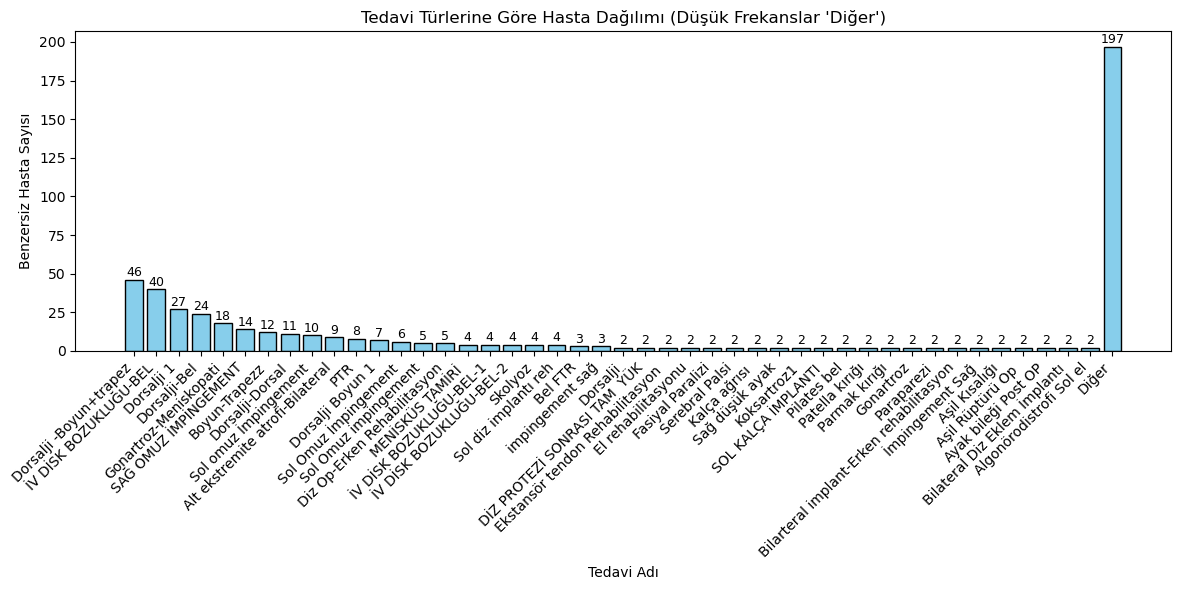

In [5186]:
# TedaviAdi bazında benzersiz hasta sayısı
tedavi_counts = df.groupby("TedaviAdi")["HastaNo"].nunique().sort_values(ascending=False)

# 1 olanları "Diğer" kategorisine topla
tedavi_summary = tedavi_counts[tedavi_counts > 1].copy()
tedavi_summary["Diğer"] = tedavi_counts[tedavi_counts == 1].sum()

# Çizim
plt.figure(figsize=(12,6))
bars = plt.bar(tedavi_summary.index, tedavi_summary.values, color="skyblue", edgecolor="black")

# Çubukların üstüne sayı ekleyelim
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.3, int(y),
             ha="center", va="bottom", fontsize=9)

plt.title("Tedavi Türlerine Göre Hasta Dağılımı (Düşük Frekanslar 'Diğer')")
plt.xlabel("Tedavi Adı")
plt.ylabel("Benzersiz Hasta Sayısı")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# TedaviSuresi

In [5187]:
df["TedaviSuresi"].value_counts()

TedaviSuresi
15 Seans    1670
10 Seans     175
20 Seans     106
2 Seans       43
17 Seans      36
4 Seans       35
16 Seans      27
21 Seans      20
18 Seans      20
5 Seans       16
19 Seans      10
11 Seans       9
30 Seans       8
3 Seans        7
8 Seans        6
22 Seans       5
25 Seans       5
37 Seans       5
29 Seans       5
7 Seans        5
6 Seans        3
1 Seans        3
14 Seans       2
Name: count, dtype: int64

In [5188]:
df["TedaviSuresi"].isna().sum()

np.int64(0)

In [5189]:
# Sayıyı direkt regex ile yakala
df["TedaviSuresi"] = df["TedaviSuresi"].str.extract(r"(\d+)").astype(float).astype("Int64")

# Kontrol
print(df["TedaviSuresi"].value_counts())

TedaviSuresi
15    1670
10     175
20     106
2       43
17      36
4       35
16      27
21      20
18      20
5       16
19      10
11       9
30       8
3        7
8        6
22       5
25       5
37       5
29       5
7        5
6        3
1        3
14       2
Name: count, dtype: Int64


## Tedavi Süresi Sütunu Dönüştürme

TedaviSuresi sütununda `"15 Seans"`, `"10 Seans"` gibi ifadeler yer almaktaydı.  
Metin farklılıkları (örneğin görünmez boşluk karakterleri) nedeniyle `"Seans"` ifadesini doğrudan silmek tutarsız sonuçlar verdi.  

Bunun yerine, sütundaki değerlerden **dijit (rakam) kısmı regex ile ayrıştırıldı** ve sütun **integer (Int64)** tipine dönüştürüldü.  

### Örnek
- `"15 Seans"` → `15`  
- `"14 Seans"` (non-breaking space içeriyor) → `14`  
- `"2 Seans"` → `2`  

Bu sayede tüm değerler temizlenmiş ve analize/modellemeye hazır hale gelmiştir.  

In [5190]:
df["TedaviSuresi"].describe()

count       2221.0
mean     14.541648
std       3.641317
min            1.0
25%           15.0
50%           15.0
75%           15.0
max           37.0
Name: TedaviSuresi, dtype: Float64

## Tedavi Süresi Sütunu İstatistiksel Özeti  

`TedaviSuresi` sütununun betimsel istatistikleri aşağıdaki gibidir:  

- **Toplam gözlem (count):** 2232  
- **Ortalama (mean):** 14.59 seans  
- **Standart sapma (std):** 3.70 seans  
- **Minimum (min):** 1 seans  
- **1. Çeyrek (25%):** 15 seans  
- **Medyan (50%):** 15 seans  
- **3. Çeyrek (75%):** 15 seans  
- **Maksimum (max):** 37 seans  

### Yorum  
- Veri setinde **en yaygın tedavi süresi 15 seans** olup, hem medyan hem de çeyrek değerler bu noktada yoğunlaşmaktadır.  
- Ortalama (14.6) da 15’e oldukça yakındır, bu da dağılımın **15 seans etrafında toplandığını** göstermektedir.  
- Minimum 1 seans ve maksimum 37 seanslık tedaviler vardır. Bu durum, birkaç aykırı (outlier) değer olduğunu düşündürmektedir.  

In [5191]:
df.groupby("HastaNo")["TedaviSuresi"].mean()

HastaNo
145134     5.0
145135    15.0
145136    10.0
145137    15.0
145138    18.0
          ... 
145533    15.0
145534    15.0
145535    15.0
145536    15.0
145537    15.0
Name: TedaviSuresi, Length: 403, dtype: Float64

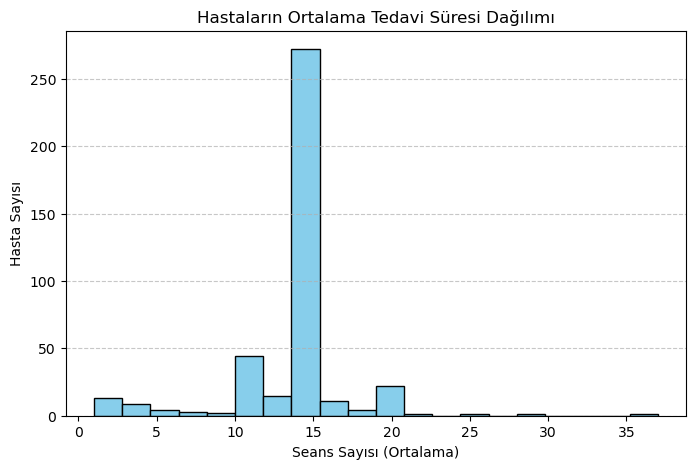

In [5192]:
# Her hasta için ortalama seans süresi
hasta_tedavi_ort = df.groupby("HastaNo")["TedaviSuresi"].mean()

# Histogram çizimi
plt.figure(figsize=(8,5))
plt.hist(hasta_tedavi_ort, bins=20, color="skyblue", edgecolor="black")
plt.title("Hastaların Ortalama Tedavi Süresi Dağılımı")
plt.xlabel("Seans Sayısı (Ortalama)")
plt.ylabel("Hasta Sayısı")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Hastaların Ortalama Tedavi Süresi Dağılımı

- Her hasta için tekrar eden kayıtlar ortalama alınarak **tek bir tedavi süresi** değeri elde edilmiştir.  
- Histogram incelendiğinde, **15 seans** ortalamasının belirgin şekilde öne çıktığı görülmektedir.  
- Çoğu hasta 10–20 seans aralığında tedavi görmüştür.  
- Daha az sayıda hasta 1–5 seans ya da 25+ seans gibi uç değerlerde yer almaktadır.  
- Bu dağılım, tedavi sürelerinin çoğunlukla standart bir uygulamaya (15 seans) bağlı olduğunu, ancak bazı hasta gruplarında farklı tedavi protokollerinin uygulandığını göstermektedir.  

# UygulamaYerleri

In [5193]:
df["UygulamaYerleri"].isna().sum()

np.int64(215)

In [5194]:
# Eksik UygulamaYerleri olanların sayısı
df.loc[df["UygulamaYerleri"].isna(), "HastaNo"].nunique()

86

- **87** hastanın `UygulamaYerleri` değeri eksik.

In [5195]:
df.loc[df["UygulamaYerleri"].isna(), "HastaNo"].unique().tolist()

[145136,
 145137,
 145141,
 145142,
 145144,
 145145,
 145148,
 145152,
 145154,
 145156,
 145160,
 145165,
 145168,
 145171,
 145172,
 145178,
 145182,
 145185,
 145187,
 145188,
 145191,
 145192,
 145193,
 145198,
 145199,
 145200,
 145204,
 145205,
 145206,
 145223,
 145228,
 145230,
 145237,
 145245,
 145246,
 145251,
 145253,
 145258,
 145263,
 145267,
 145271,
 145273,
 145275,
 145283,
 145289,
 145297,
 145304,
 145308,
 145319,
 145322,
 145328,
 145331,
 145338,
 145342,
 145344,
 145350,
 145359,
 145364,
 145371,
 145372,
 145373,
 145384,
 145395,
 145413,
 145415,
 145417,
 145426,
 145427,
 145431,
 145433,
 145439,
 145445,
 145450,
 145454,
 145473,
 145474,
 145475,
 145481,
 145490,
 145493,
 145494,
 145499,
 145502,
 145503,
 145523,
 145529]

In [5196]:
df[df["HastaNo"] == 145171]

,HastaNo,Yas,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,...,Alerji_arveles,Alerji_coraspin,Alerji_gripin,Alerji_novalgin,Alerji_polen,Alerji_sucuk,Alerji_toz,Alerji_voltaren,Alerji_volteren,Alerji_yer fstg
208,145171,68,Türkiye,"Myastenia gravis, Astım, Limb-Girdle Musküler ...",Ortopedi Ve Travmatoloji,yok,"Primer gonartroz, bilateral",Diz Op-Erken Rehabilitasyon,4,NaN,...,False,False,False,False,False,False,False,False,False,False
209,145171,68,Türkiye,"Myastenia gravis, Astım, Limb-Girdle Musküler ...",Ortopedi Ve Travmatoloji,yok,"Primer gonartroz, bilateral",Diz Op-Erken Rehabilitasyon,4,Tüm Vücut Bölgesi,...,False,False,False,False,False,False,False,False,False,False


In [5197]:
# UygulamaYerleri'ni grup bazında doldurma
df["UygulamaYerleri"] = df.groupby(
    ["HastaNo", "Bolum", "Tanilar", "TedaviAdi"]
)["UygulamaYerleri"].transform(lambda x: x.ffill().bfill())

/var/folders/yf/rds_m3nj71s_qfh7c9cx8yy40000gn/T/ipykernel_38170/3871167111.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  )["UygulamaYerleri"].transform(lambda x: x.ffill().bfill())


In [5198]:
df["UygulamaYerleri"].isna().sum()

np.int64(119)

- Bu işlem sonucunda **220-119 = 101** değeri doldurmuş olduk ve bunu da yaparken `HastaNo`,`Bolum`,`Tanilar`,`TedaviAdi` gibi sütunların eşleşmesine de bakıp yaptık böylece daha mantıklı bir doldurma işlemi yaptık.

In [5199]:
# UygulamaYerleri sütunundaki eksik değerleri "Bilinmiyor" ile dolduralım
df["UygulamaYerleri"] = df["UygulamaYerleri"].fillna("Bilinmiyor")

In [5200]:
df["UygulamaYerleri"].value_counts()

UygulamaYerleri
Bel                                                526
Boyun                                              366
Diz                                                178
Sol Omuz Bölgesi                                   148
Sağ Omuz Bölgesi                                   133
Bilinmiyor                                         119
Tüm Vücut Bölgesi                                  101
Sol El Bilek Bölgesi                                84
Sırt                                                79
Sağ Ayak Bileği Bölgesi                             63
Sol Ayak Bileği Bölgesi                             58
Sol Diz Bölgesi                                     54
Sağ El Bilek Bölgesi                                52
Sağ Diz Bölgesi                                     34
Sol Kalça Bölgesi                                   30
Sağ Kalça Bölgesi                                   29
Kalça                                               28
Sağ Kalça Bölgesi,Sol Kalça Bölgesi              

In [5201]:
CANON = {
    "bel": "Bel",
    "boyun": "Boyun",
    "omuz": "Omuz",
    "diz": "Diz",
    "el bilek": "El Bileği",
    "el bileği": "El Bileği",
    "ayak bileği": "Ayak Bileği",
    "ayak bilek": "Ayak Bileği",
    "kalça": "Kalça",
    "kalca": "Kalça",
    "sırt": "Sırt",
    "sirt": "Sırt",
    "dirsek": "Dirsek",
    "yüz": "Yüz",
    "yuz": "Yüz",
    "tüm vücut": "Tüm Vücut Bölgesi",
    "tum vucut": "Tüm Vücut Bölgesi",
    "tum vücut": "Tüm Vücut Bölgesi",
    "tüm vucut": "Tüm Vücut Bölgesi",
}

def _clean_token(tok: str) -> str:
    if not tok or pd.isna(tok):
        return ""
    x = str(tok).strip()

    # görünmez boşlukları temizle
    x = x.replace("\u00A0", " ").replace("\u200b", "").strip()

    # baştaki Sağ/Sol öneklerini kaldır
    x = re.sub(r"^\s*(Sağ|Sol)\s+", "", x, flags=re.IGNORECASE)

    # sonda/ortada geçen 'Bölgesi' kelimesini kaldır
    x = re.sub(r"\bBölgesi\b", "", x, flags=re.IGNORECASE).strip()

    # bazı bileşik adlar: 'El Bilek', 'El Bileği' → normalize için küçük harfe
    low = x.lower()

    # kanonik isim eşleme
    if low in CANON:
        return CANON[low]

    # basit içerik tabanlı yakalama (ör. 'el bilek ağrısı' gibi)
    for key, val in CANON.items():
        if re.search(rf"\b{re.escape(key)}\b", low):
            return val

    # hiçbiri tutmazsa, baş harfleri büyüt
    return x.title()

def normalize_area(text):
    if pd.isna(text):
        return "Bilinmiyor"
    # virgülle ayrılmış çoklu alanları parçala
    parts = [p.strip() for p in str(text).split(",") if str(p).strip() != ""]
    norm = [_clean_token(p) for p in parts]
    # boş ve 'Bilinmiyor' dışı değerleri topla
    norm = [n for n in norm if n]
    if not norm:
        return "Bilinmiyor"
    # tekilleştirip alfabetik sırala
    norm = sorted(set(norm))
    return ",".join(norm)

# Uygula
df["UygulamaYerleri_norm"] = df["UygulamaYerleri"].apply(normalize_area)

# Kontrol
print(df["UygulamaYerleri_norm"].value_counts().head(30))

UygulamaYerleri_norm
Bel                      526
Boyun                    366
Omuz                     293
Diz                      270
El Bileği                137
Ayak Bileği              136
Bilinmiyor               119
Kalça                    104
Tüm Vücut Bölgesi        101
Sırt                      79
Dirsek                    29
Yüz                       16
Boyun,El Bileği           12
Boyun,Sırt                11
Bel,Sırt                   9
Bel,Tüm Vücut Bölgesi      4
El Bileği,Omuz             3
Dirsek,El Bileği           2
Bel,Boyun                  2
Kalça,Omuz                 1
Omuz,Sırt                  1
Name: count, dtype: int64


## 📍 Uygulama Yerleri – Normalizasyon

Veri setindeki **UygulamaYerleri** sütununda bazı değerler sağ/sol ayrımı veya yazım farkları nedeniyle
farklı kategoriler gibi görünmekteydi. Örneğin:  
- **"Sağ Omuz Bölgesi"** ve **"Sol Omuz Bölgesi"** ayrı değerlerdi, ancak her ikisi de **"Omuz"** kategorisine ait.  
- **"Dirsek"** ve **"Dirsek Bölgesi"** aynı anlamı taşımasına rağmen farklı kaydedilmişti.  
- **"Tüm Vücut"**, **"Tüm Vücut Bölgesi"** ve yazım hatalı varyasyonları ayrı kategoriler oluşturuyordu.  

Bu durum, **One-Hot Encoding** aşamasında gereksiz sütun çoğalmasına ve modelin karmaşıklaşmasına yol açabilirdi.  
Bu nedenle şu adımlar uygulandı:  

1. **Sağ / Sol önekleri kaldırıldı.**  
   Örn. "Sağ Kalça Bölgesi" → "Kalça".  

2. **"Bölgesi" ekleri temizlendi.**  
   Örn. "Dirsek Bölgesi" → "Dirsek".  

3. **Yazım farklılıkları normalize edildi.**  
   - "El Bilek", "El Bileği" → "El Bileği"  
   - "Sırt", "Sirt" → "Sırt"  
   - "Tüm Vücut" varyasyonları → "Tüm Vücut Bölgesi"  

4. **Çoklu değerler parçalanıp tekilleştirildi.**  
   Örn. `"Sağ Kalça Bölgesi,Sol Kalça Bölgesi"` → `"Kalça"`  

5. Eksik değerler `"Bilinmiyor"` kategorisinde tutuldu.  

---

### 🎯 Sonuç
- Kategoriler daha **derli toplu** hale geldi.  
- Sağ/sol ayrımından kaynaklanan parçalanma önlendi.  
- Daha az sayıda ama daha **istatistiksel olarak anlamlı** kategori elde edildi.  
- Model için kullanılacak **One-Hot Encoding** işlemi artık daha sağlıklı çalışacak.  

> Örnek çıktı:  
> - Bel: **533**  
> - Boyun: **366**  
> - Omuz: **293**  
> - Diz: **270**  
> - El Bileği: **137**  
> - Ayak Bileği: **136**  
> - Kalça: **104**  
> - Bilinmiyor: **119**  

In [5202]:
df["UygulamaYerleri_norm"] = df["UygulamaYerleri_norm"].apply(lambda x: x if df["UygulamaYerleri_norm"].value_counts()[x] >= 10 else "Diğer")

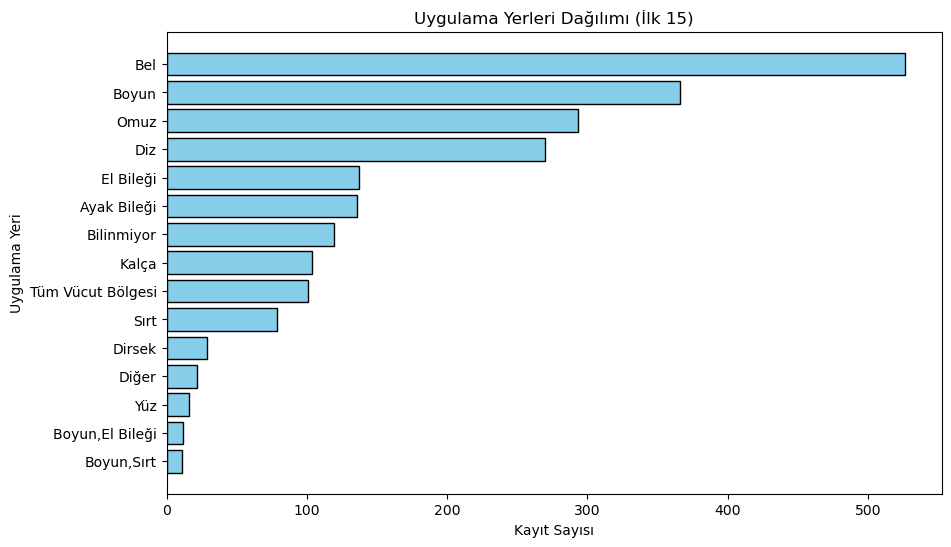

In [5203]:
counts = df["UygulamaYerleri_norm"].value_counts().head(15)

plt.figure(figsize=(10,6))
bars = plt.barh(counts.index, counts.values, color="skyblue", edgecolor="black")
plt.xlabel("Kayıt Sayısı")
plt.ylabel("Uygulama Yeri")
plt.title("Uygulama Yerleri Dağılımı (İlk 15)")
plt.gca().invert_yaxis()  # en büyük değer en üstte olsun
plt.show()

In [5204]:
df = pd.get_dummies(df, columns=["UygulamaYerleri_norm"], drop_first=True)

## 📝 Uygulama Yerleri Sütunu – One-Hot Encoding

- `UygulamaYerleri` sütununda çok sayıda farklı bölge bulunduğundan önce **benzer bölgeler birleştirilmiş**, nadir görülen bölgeler ise **“Diğer”** kategorisi altında toplanmıştır.  
- Bu normalizasyon sonrası sütun **`UygulamaYerleri_norm`** olarak yeniden oluşturulmuştur.  
- Ardından sütun, **One-Hot Encoding (OHE)** yöntemiyle sayısal forma dönüştürülmüştür.  
- Her uygulama bölgesi için ayrı bir sütun açılmıştır (örn. `UygulamaYerleri_norm_Boyun`, `UygulamaYerleri_norm_Omuz`, `UygulamaYerleri_norm_Bel` vb.).  
- Hasta ilgili bölgede uygulama aldıysa sütun değeri **1**, almadıysa **0** olarak kodlanmıştır.  
- `drop_first=True` parametresi kullanılarak bir kategori referans alınmış ve böylece **çoklu doğrusal bağımlılık (multicollinearity)** önlenmiştir.  
- Bu işlem sayesinde, uygulama yapılan bölgenin **Uygulama Süresi** üzerindeki etkisi regresyon modelinde ayrı ayrı değerlendirilebilecektir.  

# Uygulama Süresi 

In [5205]:
df["UygulamaSuresi"].value_counts()

UygulamaSuresi
20 Dakika    1527
5 Dakika      358
10 Dakika     221
15 Dakika      86
30 Dakika      10
45 Dakika      10
25 Dakika       5
40 Dakika       2
3 Dakika        1
8 Dakika        1
Name: count, dtype: int64

In [5206]:
df["UygulamaSuresi"].isna().sum()

np.int64(0)

In [5207]:
# "Dakika" kelimesini sil ve integer'a çevir
df["UygulamaSuresi"] = df["UygulamaSuresi"].str.replace(" Dakika", "", regex=False).astype(int)

In [5208]:
df["UygulamaSuresi"].describe()

count    2221.000000
mean       16.567312
std         6.268655
min         3.000000
25%        10.000000
50%        20.000000
75%        20.000000
max        45.000000
Name: UygulamaSuresi, dtype: float64

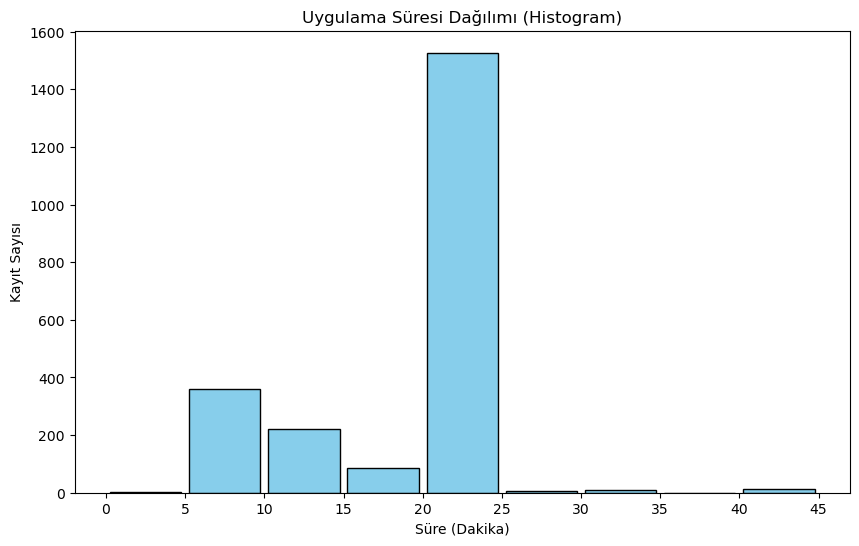

In [5209]:
plt.figure(figsize=(10,6))
plt.hist(df["UygulamaSuresi"], bins=range(0, 50, 5), color="skyblue", edgecolor="black", rwidth=0.9)

plt.title("Uygulama Süresi Dağılımı (Histogram)")
plt.xlabel("Süre (Dakika)")
plt.ylabel("Kayıt Sayısı")
plt.xticks(range(0, 50, 5))  
plt.show()

## ⏱️ Uygulama Süresi – Tanımlayıcı İstatistikler

`UygulamaSuresi` sütununa ait özet istatistikler aşağıda verilmiştir:

- **Toplam gözlem sayısı (count):** 2232  
- **Ortalama (mean):** 16.6 dakika  
- **Standart sapma (std):** 6.27 dakika  
- **Minimum değer (min):** 3 dakika  
- **1. Çeyrek (25%):** 10 dakika  
- **Medyan (50%):** 20 dakika  
- **3. Çeyrek (75%):** 20 dakika  
- **Maksimum değer (max):** 45 dakika  

### 🎯 Yorum
- Verilerin büyük bir kısmı **10–20 dakika** aralığında yoğunlaşmıştır.  
- **Medyanın 20 dakika** çıkması, en sık uygulanan sürenin bu olduğunu göstermektedir.  
- Minimum (3 dakika) ve maksimum (45 dakika) değerler, standart protokolün dışında kalan daha az rastlanan uygulamalardır.  
- Ortalama (16.6 dakika), medyandan biraz düşük olup, **kısa süreli uygulamaların (özellikle 5 ve 10 dakika)** ortalamayı aşağı çektiğini göstermektedir.  

# Son yorumlarım

In [5210]:
df.shape

(2221, 64)

In [5211]:
df.columns

Index(['HastaNo', 'Yas', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji',
       'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri',
       'UygulamaSuresi', 'Cinsiyet_Erkek', 'Cinsiyet_Kadın', 'KanGrubu_0 Rh+',
       'KanGrubu_A Rh+', 'KanGrubu_B Rh+', 'KanGrubu_AB Rh+', 'KanGrubu_0 Rh-',
       'KanGrubu_A Rh-', 'KanGrubu_B Rh-', 'KanGrubu_AB Rh-', 'Uyruk_Türkiye',
       'Kronik_aritmi', 'Kronik_astm', 'Kronik_becker muskuler distrofisi',
       'Kronik_bilinmiyor', 'Kronik_diger', 'Kronik_diyabet',
       'Kronik_duchenne muskuler distrofisi', 'Kronik_fshd',
       'Kronik_hipertansiyon', 'Kronik_hipertiroidizm', 'Kronik_hipotiroidizm',
       'Kronik_kalp yetmezligi', 'Kronik_lgmd', 'Kronik_myastenia gravis',
       'Kronik_polimiyozit',
       'Bolum_Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi',
       'Bolum_Ortopedi Ve Travmatoloji', 'Bolum_İç Hastalıkları',
       'Alerji_arveles', 'Alerji_coraspin', 'Alerji_gripin', 'Alerji_novalgin',
       'Alerji_polen', 'Alerji_su

In [5212]:
df.shape

(2221, 64)

## 📊 Veri Seti Son Durum Özeti

- Başlangıçta veri seti **2235 satır, 13 sütun** içermekteydi.  
- Veri temizleme, normalizasyon ve encoding işlemlerinden sonra veri seti **2221 satır, 64 sütun** olmuştur.  

### 🔑 Yapılan Başlıca İşlemler
- **Eksik değerler**:
  - `KronikHastalik`, `Bolum`, `KanGrubu` gibi sütunlarda eksik değerler **"Bilinmiyor"** ile dolduruldu.  
  - Tamamen eksik değerlere sahip bazı hastalar veri setinden çıkarıldı.  

- **Kategorik değişkenler**:
  - `Cinsiyet`, `Bolum`, `Alerji`, `KronikHastalik`, `UygulamaYerleri`, `KanGrubu`,sütunlarına **One-Hot Encoding (OHE)** uygulandı.  
  - Nadir kategoriler `"Diger"` altında toplandı.  
  - `Uyruk` sütununa **Binary Encoding** uygulandı (çok baskın Türkiye kategorisi ve az sayıda diğer ülkeler nedeniyle OHE yerine tercih edildi).  

- **Normalizasyon**:
  - `Alerji`, `KronikHastalik`, `UygulamaYerleri` sütunlarındaki yazım hataları ve tekrarlar temizlendi.  

- **Sayısal dönüşümler**:
  - `TedaviSuresi` → seans sayısı **int** değerine dönüştürüldü(hedef değişken).  
  - `UygulamaSuresi` → dakika bilgisi çıkarılıp **int** hale getirildi .  

### 📌 Genel Yorumlar
- Satır sayısının **2235 → 2221** azalması, tamamen eksik kayda sahip hastaların çıkarılmasından kaynaklanmaktadır.  
- Sütun sayısının **13 → 49** artması, kategorik sütunların OHE/Binary Encoding sonrası genişlemesinden kaynaklanmaktadır.  
- `"Diger"` kategorisi sayesinde nadir değerler gruplanarak modelde gürültü azaltılmıştır.  
- Veri seti artık regresyon modeline uygun hale gelmiştir: hem sayısal hem kategorik değişkenler encode edilmiş ve eksikler tamamlanmıştır.  

➡️ Bundan sonraki adımda **özellik seçimi (feature selection)** yapılarak hangi değişkenlerin `TedaviSuresi` üzerinde en etkili olduğu görülebilir.  

In [5213]:
df = df.drop(columns=["HastaNo", "Uyruk", "KronikHastalik", "Bolum", "Alerji", "UygulamaYerleri"])

## 📊 Modelde Kullanılacak Sütunların Düzenlenmesi

- Veri ön işleme sürecinde **One-Hot Encoding (OHE)** ve **Binary Encoding** işlemleri uygulanmıştır.  
- Bu nedenle, orijinal kategorik sütunların (**Cinsiyet, KanGrubu, Uyruk, KronikHastalik, Bolum, Alerji, UygulamaYerleri**) tutulmasına gerek yoktur.  
- Ayrıca, **HastaNo** sadece kimlik bilgisi olduğu için model açısından anlam taşımamaktadır.  
- Bu sütunlar veri setinden çıkarılmıştır.  

### ✅ Modelde Kalacak Sütunlar
- **Yas** (sayısal)  
- **TedaviSuresi** (sayısal)  
- **UygulamaSuresi** (hedef değişken)  
- Encoding sonrası elde edilen tüm:  
  - `Cinsiyet_...`  
  - `KanGrubu_...`  
  - `Uyruk_...`  
  - `Kronik_...`  
  - `Bolum_...`  
  - `Alerji_...`  
  - `UygulamaYerleri_norm_...` sütunları  

👉 Bu şekilde model, yalnızca anlamlı ve sayısal olarak işlenebilir sütunlarla kurulacaktır.

In [5214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2221 entries, 0 to 2223
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Yas                                                   2221 non-null   int64 
 1   Tanilar                                               2221 non-null   object
 2   TedaviAdi                                             2221 non-null   object
 3   TedaviSuresi                                          2221 non-null   Int64 
 4   UygulamaSuresi                                        2221 non-null   int64 
 5   Cinsiyet_Erkek                                        2221 non-null   bool  
 6   Cinsiyet_Kadın                                        2221 non-null   bool  
 7   KanGrubu_0 Rh+                                        2221 non-null   bool  
 8   KanGrubu_A Rh+                                        2221 non-null   boo

In [5215]:
df = df.drop(columns=['Tanilar', 'TedaviAdi'])

## 📝 Tanılar ve Tedavi Adı Sütunlarının Modelden Çıkarılması

- **Tanılar** sütunu çok çeşitli ve serbest metin içeriklerinden oluşmaktadır.  
  - Standartlaştırması zor olduğu için doğrudan lineer regresyon modelinde kullanılması uygun değildir.  
  - Anlamlı hale getirilebilmesi için ileri düzey metin işleme (TF-IDF, embedding vb.) gerekir.  

- **Tedavi Adı** sütunu ise uygulanan seans sayısını ifade eden kategorik değerlerden oluşmaktadır.  
  - Ancak bu bilgi zaten **Tedavi Süresi** sütununda sayısal olarak elde edilmiştir.  
  - Dolayısıyla bu sütun redundant (gereksiz tekrar) olup modelden çıkarılmıştır.  

✅ Bu iki sütunun çıkarılması mantıklı bulunmuştur çünkü hedef değişken UygulamaSüresi olduğundan ve bu da int bir değer olduğundan ki kuracağımız modelde büyük bir ihtimal lineer regresyon modeli olacağından çok fazla değişkeni olan bu 2 adet object türü sınıfı atma kararını verdim.